https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

In [1]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
import en_core_web_sm

#gensim library: Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

#vizualization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

#clustering
from sklearn.cluster import KMeans

#Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from sklearn.preprocessing import StandardScaler #scale arrays
import multiprocessing #speed up computing
import os #saving & loading models

In [2]:
df_75 = pd.read_csv('procurement_enterprise_sg.csv')
df_75.shape

(254315, 6)

In [146]:
df_75.tail()

,s/n,Quotation Description,Category,Main Category,Award Month,Award Year
254310,311280,Conceptualisation And Design For URA 2019 Exhi...,Professional Services,Services,December,2018
254311,311281,"Term Contract For Supply, Installation And Mai...","Building, M&E Maintenance",Facilities Management,December,2018
254312,311282,Term Contract For Electrical Minor Works For M...,"Building, M&E Maintenance",Facilities Management,December,2018
254313,311283,Term Contract For Soil Investigation Works For...,Soil Investigation & Stabilization,Construction,December,2018
254314,311284,Renewal Of Backup Software Licences Maintenance,Softwares & Licences,IT & Telecommunication,December,2018


In [4]:
df_25 = pd.read_csv('procurement_enterprise_sg2.csv')
df_25.shape

(56969, 6)

In [5]:
df_25.tail()

,s/n,Quotation Description,Category,Main Category,Award Month,Award Year
56964,283755,Customer Satisfaction Survey 2012,Survey Services,Administration & Training,December,2012
56965,283756,"SURVEY OPERATIONS, DATA COLLECTION, DATA MANAG...",Survey Services,Administration & Training,December,2012
56966,283757,Office Rennovation,General Building & Minor Construction Works,Construction,November,2012
56967,283758,Provision of services to conduct surveys for C...,Survey Services,Administration & Training,December,2012
56968,283759,Provision of Custodian Services,Professional Services,Services,November,2012


In [7]:
# combine data
df = pd.concat([df_75, df_25], ignore_index=True)
df.shape

(311284, 6)

In [8]:
df.head()

,s/n,Quotation Description,Category,Main Category,Award Month,Award Year
0,52568,Engagement of Video-recording services for the...,Professional Services,Services,January,2013
1,52569,INVITATION TO QUOTE FOR SUPPLY AND INSTALL STA...,General Building & Minor Construction Works,Construction,January,2013
2,52570,Printing and delivery of MOE Long Service Awar...,Printing Services,Administration & Training,January,2013
3,52571,TAMIL LANGUAGE TRANSLATION & TYPE SETTING OF P...,Professional Services,Services,January,2013
4,52572,Production of 5 Videos for Primary Science Syl...,Music & Video,Administration & Training,January,2013


In [9]:
df.tail()

,s/n,Quotation Description,Category,Main Category,Award Month,Award Year
311279,283755,Customer Satisfaction Survey 2012,Survey Services,Administration & Training,December,2012
311280,283756,"SURVEY OPERATIONS, DATA COLLECTION, DATA MANAG...",Survey Services,Administration & Training,December,2012
311281,283757,Office Rennovation,General Building & Minor Construction Works,Construction,November,2012
311282,283758,Provision of services to conduct surveys for C...,Survey Services,Administration & Training,December,2012
311283,283759,Provision of Custodian Services,Professional Services,Services,November,2012


In [22]:
overall_count = 0
trip_count = 0
education_count = 0
for row in df.index:
    if 'australia' in df.iloc[row,1].lower():
        overall_count += 1
        if ('travel' in df.iloc[row,1].lower()) or ('trip' in df.iloc[row,1].lower()):
            trip_count += 1
        if ('mathematics' in df.iloc[row,1].lower()) or ('assessment' in df.iloc[row,1].lower()) or ('education' in df.iloc[row,1].lower()):
            education_count += 1
trip_count, education_count, overall_count, trip_count/float(overall_count), education_count/float(overall_count)    

(91, 46, 226, 0.4026548672566372, 0.20353982300884957)

In [21]:
for row in df.index:
    if 'australia' in df.iloc[row,1].lower():

        if ('travel' in df.iloc[row,1].lower()) or ('trip' not in df.iloc[row,1].lower()):
            print(df.iloc[row,1])

Anderson Secondary School requires vendor : To provide and deliver the services for : Training For Mathematics Olympiads and Australian Mathematics Compettions. Please note that number of sessions may vary.
Provision of airfare, accommodation, meals, travel insurance, transport and land tour to Sydney,Australia for staff and students from 10-16 March 2013.
Provision of airfare, accommodation, meals, travel insurance, transport and land tour to Melbourne,Australia for staff and students from 17-22 March 2013.
(SDAR/12/0247)Overseas Enrichment Programme - Group Package to Adelaide Australia
To supply,deliver and process International Competitions and Assessments for Schools (ICAS)(Science) by Educational Assessment Australia (EAA) 2013. Please see attached for details.
Qihua Pri Sch invite quotes on Educational and Cultural Learning Journey to Perth, Australia 2013. To refer to attachment for details.
Provision to supply instructors to conduct preparatory training for Australian Mathemat

Invitation to quote and supply 6 days Overseas Adventure Expedition to Victoria, Australia for Xinmin Secondary School Outdoor Adventure Club from 13 Mar to 18 Mar 2017.
PROCUREMENT OF SINGAPORE MATHEMATICAL OLYMPIAD/AUSTRALIAN MATHS INSTRUCTOR FOR THE DURATION OF JANUARY TO JULY 2017 FOR TANJONG KATONG SEC SCH.
(205/C-712-100-001-001) Logistics services for transportation of PV modules and Electrical Equipment from Singapore to Alice Springs, Northern Territory, Australia
Yuan Ching Secondary School - Provision of Trainers for Training Programme for Australian Mathematics Competition (Please refer to attachments)
6D5N STEM-focused learning journey to Melbourne, Australia, incorporating elements of Science, Technology (Computing), Engineering and Mathematics.
Provision of services for Singapore Schools Track and Field Team to travel to Perth, Australia for Little Athletics Western Australia / Majlis Sukan Sekolah Malaysia / Singapore Schools Sports Council (LAWA/MSSM/ SSSC U14 and U15)

Provision for International Competition and Assessment for Schools (ICAS) - The University of New South Wales (UNSW) Educational Assessment Australia-Yr 2012
IS11/0131 - Purchase of Air-tickets to UK & Australia for CLS students on Overseas Industrial Training Programme (OITP). Please refer to the specification file attached. For more details pl.contact the requestor Mr.Carl Tay Tel:68707993
IS11/0120 - Purchase of Air-tickets and visa (if applicable) for 2 SEEE students on Overseas Industrial Training Programme (OITP) to University of New South Wales, Australia from 04/03/12 to 14/04/12. Please refer to the specification file attached. For more details pl.contact the requestor Mr.Tay Kah Hao Tel:68707993
IS11/0097 Purchase of Airtickets for CLS DACP & DPCS students Overseas Industrial Training Programme (OITP) to China,Japan,Germany & Australia. Please refer to the specification files attached. For more details please liaise with the requestor Mr.Tay Kah Hao Tel:68707993
IS11/0133 - O

In [40]:
words_v3 = pd.read_csv('procurement_word2vec_output_3.csv')

In [41]:
words_v3.shape

(100045, 9)

In [42]:
words_v3.head()

,word_filters,word,is_target_word,proximity_score,x,y,cluster,cluster_2,new_word
0,engagement,engagement,1,1.000000,-0.648956,0.203685,28,16,0
1,engagement,engage,0,0.604757,-0.236503,1.350298,28,9,0
2,engagement,appointment,0,0.472092,-0.142973,0.485635,28,17,0
3,engagement,appoint,0,0.464373,-0.139420,0.480227,28,17,0
4,engagement,appointment_panel,0,0.424004,-0.133235,0.471711,28,17,0


In [113]:
to_remove = [0,1,3,10,12,15,23,26,30,32]
to_group = [4,22,11,21]
to_refine = [14,16,17,18,19,29,31]
unchanged = [2,5,6,7,8,9,13,20,24,25,27,28]

In [117]:
set(to_refine)& set(unchanged)

set()

In [114]:
len(to_remove)+len(to_group)+len(to_refine)+len(unchanged)

33

In [46]:
df1 = words_v3[words_v3.is_target_word == 1][['word','x','y','cluster_2']]
df1.shape

(9095, 4)

In [47]:
df1.head()

,word,x,y,cluster_2
0,engagement,-0.648956,0.203685,16
11,video_recording,-1.650242,-0.454080,29
22,service,-0.449798,-0.157699,17
33,seminar,-0.041923,0.727661,13
44,jan,0.808144,1.661787,23


In [52]:
# rename useless clusters as to_remove
df_to_remove = df1[df1['cluster_2'].isin(to_remove)]
df_to_remove.shape

(2247, 4)

In [53]:
df_to_remove.cluster_2.value_counts()

1     392
3     366
10    291
32    290
12    270
26    235
15    215
23    132
30     55
0       1
Name: cluster_2, dtype: int64

In [93]:
df_to_remove['cluster_3'] = 9999

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_to_remove.cluster_3.value_counts()

9999    2247
Name: cluster_3, dtype: int64

In [58]:
df_to_group = df1[df1['cluster_2'].isin(to_group)]
df_to_group.shape

(1201, 4)

In [59]:
df_to_group.cluster_2.value_counts()

22    431
4     372
21    248
11    150
Name: cluster_2, dtype: int64

In [100]:
cluster_3 = []
for cluster in df_to_group.cluster_2:
    if cluster == 22:
        cluster_3.append(4+100)
    elif cluster == 21:
        cluster_3.append(11+100)
    else:
        cluster_3.append(cluster+100)
df_to_group['cluster_3'] = cluster_3
df_to_group.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(1201, 5)

In [102]:
df_to_group.cluster_3.value_counts()

104    803
111    398
Name: cluster_3, dtype: int64

In [66]:
df_to_refine = df1[df1['cluster_2'].isin(to_refine)]
df_to_refine.shape

(2488, 4)

In [68]:
df_to_refine.cluster_2.value_counts()

29    469
19    466
17    418
16    412
14    396
31    266
18     61
Name: cluster_2, dtype: int64

In [69]:
df_to_refine.head()

,word,x,y,cluster_2
0,engagement,-0.648956,0.203685,16
11,video_recording,-1.650242,-0.454080,29
22,service,-0.449798,-0.157699,17
55,professional_service,0.537491,0.885383,18
66,invitation_quote,-0.297474,1.487337,29


In [71]:
x = df_to_refine.x.tolist()
y = df_to_refine.y.tolist()

In [73]:
x[:10], y[:10]

([-0.6489560604095459,
  -1.6502419710159302,
  -0.4497980177402496,
  0.5374910235404968,
  -0.297473818063736,
  -0.2636882066726685,
  1.1911039352416992,
  -0.39458027482032776,
  -0.7458170056343079,
  -0.05576720461249352],
 [0.20368541777133944,
  -0.4540802538394928,
  -0.15769915282726288,
  0.8853833079338074,
  1.4873367547988892,
  1.5124158859252932,
  -0.24261298775672915,
  -0.9283087849617004,
  0.5695427060127258,
  -0.7493376135826111])

In [74]:
arrays_2d = np.column_stack((x, y))

In [75]:
arrays_2d[:10]

array([[-0.64895606,  0.20368542],
       [-1.65024197, -0.45408025],
       [-0.44979802, -0.15769915],
       [ 0.53749102,  0.88538331],
       [-0.29747382,  1.48733675],
       [-0.26368821,  1.51241589],
       [ 1.19110394, -0.24261299],
       [-0.39458027, -0.92830878],
       [-0.74581701,  0.56954271],
       [-0.0557672 , -0.74933761]])

In [76]:
arrays_2d.shape

(2488, 2)

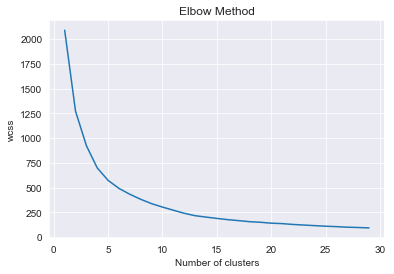

Time to plot: 0.08 mins


In [77]:
from sklearn.cluster import KMeans
t = time()
wcss = []
k_size = 30
X = arrays_2d
for i in range(1,k_size):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,k_size),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
print('Time to plot: {} mins'.format(round((time() - t) / 60, 2)))

In [79]:
t = time()
km4=KMeans(n_clusters=10,init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
word_groups = km4.labels_
print('Time to cluster: {} mins'.format(round((time() - t) / 60, 2)))
word_groups.shape

Time to cluster: 0.0 mins


(2488,)

In [80]:
word_groups

array([5, 9, 5, ..., 8, 8, 3], dtype=int32)

In [81]:
df_to_refine['cluster_3'] = word_groups.tolist()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_to_refine.head()

,word,x,y,cluster_2,cluster_3
0,engagement,-0.648956,0.203685,16,5
11,video_recording,-1.650242,-0.454080,29,9
22,service,-0.449798,-0.157699,17,5
55,professional_service,0.537491,0.885383,18,3
66,invitation_quote,-0.297474,1.487337,29,2


In [83]:
df_to_refine.tail()

,word,x,y,cluster_2,cluster_3
99902,tender_itt,-0.124742,0.408841,17,3
99913,comm_grf,-0.428034,-0.259444,29,5
99924,chancery,1.007888,0.591206,19,8
99968,consulate,1.007336,0.591845,19,8
99979,opmt,-0.232493,0.288687,29,3


In [84]:
df_to_refine.shape

(2488, 5)

In [118]:
df_unchanged = df1[df1['cluster_2'].isin(unchanged)]
df_unchanged.shape

(3159, 4)

In [119]:
df_unchanged.cluster_2.value_counts()

27    359
6     358
20    322
25    313
9     301
28    280
5     265
7     245
2     222
24    180
13    161
8     153
Name: cluster_2, dtype: int64

In [120]:
df_unchanged['cluster_3'] = df_unchanged.cluster_2 + 100

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_unchanged.cluster_3.value_counts()

127    359
106    358
120    322
125    313
109    301
128    280
105    265
107    245
102    222
124    180
113    161
108    153
Name: cluster_3, dtype: int64

In [122]:
frames = [df_unchanged, df_to_refine, df_to_group, df_to_remove]

In [123]:
count = 0
for frame in frames:
    print(frame.shape,'\n', frame.head())
    count += frame.shape[0]
count

(3159, 5) 
                 word         x         y  cluster_2  cluster_3
33           seminar -0.041923  0.727661         13        113
88           install  0.976044 -0.728925         28        128
99   stainless_steel  0.537636 -0.951629         20        120
121           holder  0.121421 -0.933564         20        120
132           inside  1.057265 -0.490041         28        128
(2488, 5) 
                     word         x         y  cluster_2  cluster_3
0             engagement -0.648956  0.203685         16          5
11       video_recording -1.650242 -0.454080         29          9
22               service -0.449798 -0.157699         17          5
55  professional_service  0.537491  0.885383         18          3
66      invitation_quote -0.297474  1.487337         29          2
(1201, 5) 
               word         x         y  cluster_2  cluster_3
352           main -1.446298  1.569301         11        111
396        primary -0.648219  1.758547         21        111
4

9095

In [129]:
df_binded = pd.concat(frames)
df_binded = df_binded.sort_index()
df_binded.shape

(9095, 5)

In [145]:
df_binded.cluster_3.unique().shape

(25,)

In [142]:
df_binded.head()

,word,x,y,cluster_2,cluster_3
0,engagement,-0.648956,0.203685,16,5
11,video_recording,-1.650242,-0.454080,29,9
22,service,-0.449798,-0.157699,17,5
33,seminar,-0.041923,0.727661,13,113
44,jan,0.808144,1.661787,23,9999


In [126]:
df1.head()

,word,x,y,cluster_2
0,engagement,-0.648956,0.203685,16
11,video_recording,-1.650242,-0.454080,29
22,service,-0.449798,-0.157699,17
33,seminar,-0.041923,0.727661,13
44,jan,0.808144,1.661787,23


In [131]:
df_binded2 =df_binded[['word','cluster_3']]
df_binded2.shape

(9095, 2)

In [132]:
df_binded2.head()

,word,cluster_3
0,engagement,5
11,video_recording,9
22,service,5
33,seminar,113
44,jan,9999


In [134]:
words_v4 = pd.merge(words_v3, df_binded2, how='left', on=['word'])
words_v4.head(20)

,word_filters,word,is_target_word,proximity_score,x,y,cluster,cluster_2,new_word,cluster_3
0,engagement,engagement,1,1.000000,-0.648956,0.203685,28,16,0,5
1,engagement,engage,0,0.604757,-0.236503,1.350298,28,9,0,109
2,engagement,appointment,0,0.472092,-0.142973,0.485635,28,17,0,3
3,engagement,appoint,0,0.464373,-0.139420,0.480227,28,17,0,3
4,engagement,appointment_panel,0,0.424004,-0.133235,0.471711,28,17,0,3
5,engagement,provision,0,0.410325,-0.298554,1.480558,28,17,0,2
6,engagement,engage_external,0,0.405267,-0.274829,1.304563,28,21,1,111
7,engagement,hire,0,0.393758,-0.318998,1.634421,17,1,0,9999
8,engagement,employ,0,0.385450,-0.663324,1.619634,17,11,0,111
9,engagement,conduct,0,0.377769,-1.224839,0.882213,11,16,0,6


In [135]:
words_v4.shape, words_v3.shape

((100045, 10), (100045, 9))

In [136]:
# export to csv for tableau viz
words_v4.to_csv('procurement_word2vec_output_4.csv', index=False)

**Exploring the model**

In [23]:
W2V_model = Word2Vec.load(os.path.join("trained_models", "procurement_w2v_model_v2.w2v"))

INFO - 16:34:04: loading Word2Vec object from trained_models/procurement_w2v_model_v2.w2v
INFO - 16:34:04: loading wv recursively from trained_models/procurement_w2v_model_v2.w2v.wv.* with mmap=None
INFO - 16:34:04: setting ignored attribute vectors_norm to None
INFO - 16:34:04: loading vocabulary recursively from trained_models/procurement_w2v_model_v2.w2v.vocabulary.* with mmap=None
INFO - 16:34:04: loading trainables recursively from trained_models/procurement_w2v_model_v2.w2v.trainables.* with mmap=None
INFO - 16:34:04: setting ignored attribute cum_table to None
INFO - 16:34:04: loaded trained_models/procurement_w2v_model_v2.w2v


In [24]:
# Most similar to:
# Here, we will ask our model to find the word most similar
W2V_model.wv.most_similar(positive=["instructor"], topn = 20)

INFO - 16:34:07: precomputing L2-norms of word weight vectors


[('coach', 0.7642682790756226),
 ('cca', 0.6769044995307922),
 ('instuctor', 0.6722003221511841),
 ('programme', 0.6607232093811035),
 ('data_entry_supply_of_manpower_service', 0.6169559955596924),
 ('intructor', 0.6019754409790039),
 ('coach_week', 0.5853027105331421),
 ('enrichment_programme', 0.5798230767250061),
 ('trainer', 0.5735816955566406),
 ('course', 0.56288743019104),
 ('week', 0.5565593242645264),
 ('cca_training', 0.5513682961463928),
 ('curricular', 0.550825834274292),
 ('phpp', 0.5466946959495544),
 ('enrichment', 0.5396819114685059),
 ('main_assistant', 0.5372986197471619),
 ('primary', 0.5332051515579224),
 ('cca_train', 0.5318525433540344),
 ('sec', 0.5261948704719543),
 ('coaching', 0.520183801651001)]

A small precision here:<br>
The dataset is the Simpsons' lines of dialogue; therefore, when we look at the most similar words from "homer" we do not necessary get his family members, personality traits, or even his most quotable words. No, we get what other characters (as Homer does not often refers to himself at the 3rd person) said along with "homer", such as how he feels or looks ("depressed"), where he is ("hammock"), or with whom ("marge").

In [25]:
# Let's see what the bigram "ict_trainer" gives us by comparison:
W2V_model.wv.most_similar(positive=["ict_trainer"], topn = 20)

[('multimedia_educator', 0.6915144920349121),
 ('ict_executive', 0.691304087638855),
 ('residential_trainer', 0.6099011301994324),
 ('resident_trainer', 0.5433487296104431),
 ('residential_ict', 0.5263580679893494),
 ('ict', 0.523139238357544),
 ('administrative_assistant', 0.48735958337783813),
 ('clerical', 0.45518091320991516),
 ('receptionist', 0.4512661099433899),
 ('ict_baseline', 0.4319968819618225),
 ('trainer', 0.4307260513305664),
 ('teacher_aide', 0.42757663130760193),
 ('admin_assistant', 0.4265969395637512),
 ('admin_support', 0.418770968914032),
 ('technician', 0.3921395540237427),
 ('receptionist_cum', 0.3834846019744873),
 ('laboratory_technician', 0.37853533029556274),
 ('cso', 0.37358585000038147),
 ('competent_personnel', 0.3666292428970337),
 ('tae', 0.36636799573898315)]

In [26]:
W2V_model.wv.most_similar(positive=["event_management"], topn = 20)

[('event', 0.5895073413848877),
 ('event_organiser', 0.5345196723937988),
 ('event_organizer', 0.520442545413971),
 ('organise_manage', 0.5098411440849304),
 ('logistic', 0.48059290647506714),
 ('event_organising', 0.47467467188835144),
 ('ordination', 0.4675123691558838),
 ('venue_catering', 0.46591970324516296),
 ('opening_ceremony', 0.45518171787261963),
 ('video_music__video', 0.45452025532722473),
 ('award_ceremony', 0.451850950717926),
 ('ceremony_event_organising', 0.45135584473609924),
 ('logistical_support', 0.4443666934967041),
 ('coordination', 0.43883249163627625),
 ('day_observance', 0.4382864534854889),
 ('collateral_public_relations__counsell', 0.43748337030410767),
 ('collateral', 0.4369582533836365),
 ('logistics', 0.4314712882041931),
 ('scholarship_award', 0.4296776354312897),
 ('roadshow', 0.4245588183403015)]

In [27]:
# months
W2V_model.wv.most_similar(positive=["jan"], topn = 20)

[('feb', 0.7635514736175537),
 ('dec', 0.7347989678382874),
 ('mar', 0.7319443821907043),
 ('apr', 0.7054874897003174),
 ('nov', 0.7000276446342468),
 ('aug', 0.6969469785690308),
 ('oct', 0.681373119354248),
 ('june', 0.6411374807357788),
 ('jun', 0.6314455270767212),
 ('jul', 0.6310393810272217),
 ('april', 0.6175450086593628),
 ('july', 0.6083065271377563),
 ('march', 0.59345543384552),
 ('tentative', 0.5518104434013367),
 ('august', 0.5426082611083984),
 ('december', 0.5383865833282471),
 ('till_dec', 0.5346404314041138),
 ('date_confirm', 0.5321895480155945),
 ('jul_aug', 0.5293295979499817),
 ('january', 0.5221281051635742)]

In [28]:
# others
W2V_model.wv.most_similar(positive=["cancer"], topn = 20)

[('gene', 0.4725484549999237),
 ('assay', 0.46541497111320496),
 ('genome', 0.4605390727519989),
 ('mirna', 0.45966392755508423),
 ('exome', 0.4546380639076233),
 ('serum', 0.4522756338119507),
 ('rna', 0.44418227672576904),
 ('microrna', 0.44308197498321533),
 ('illumina', 0.4407689571380615),
 ('antibody', 0.4352955222129822),
 ('sequencing', 0.4276600480079651),
 ('generation_sequencing', 0.4223805069923401),
 ('vivo', 0.41523605585098267),
 ('elisa', 0.41389018297195435),
 ('microarray', 0.4017879366874695),
 ('high_throughput', 0.39437204599380493),
 ('quantitative', 0.39319801330566406),
 ('amplification', 0.3913259506225586),
 ('dna', 0.3882821202278137),
 ('immunoassay', 0.3866175413131714)]

In [77]:
# Odd-One-Out:
# Here, we ask our model to give us the word that does not belong to the list!
W2V_model.wv.doesnt_match(['cooking', 'procurement', 'kitchen'])

'procurement'

In [78]:
# Analogy difference:
# Which word is to software as library is to book
W2V_model.wv.most_similar(positive=["software", "library"], negative=["book"], topn=3)

[('firmware', 0.44597509503364563),
 ('software_softwares__licence', 0.4248948395252228),
 ('software_license', 0.42353540658950806)]

In [29]:
len(W2V_model.wv.vocab)

9095

In [32]:
# combine all word vectors into 9095*300
arrays = np.empty((0, 300), dtype='f')

for word in W2V_model.wv.vocab:
#     print(word)
    wrd_vector = W2V_model.wv.__getitem__([word])
    arrays = np.append(arrays, wrd_vector, axis=0)

arrays.shape

(9095, 300)

In [31]:
arrays[0]==W2V_model['engagement']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [33]:
np.std(arrays), np.mean(arrays)

(0.5457193, -0.0005125597)

In [34]:
max([max(arrays[i]) for i in range(300)]), min([min(arrays[i]) for i in range(300)])

(3.0336146, -3.0120194)

In [35]:
# Use standard scalar on word vector arrays before clustering and dimensionality reduction
t = time()
arrays1 = StandardScaler().fit_transform(arrays)
print('Time to scale data: {} mins'.format(round((time() - t) / 60, 2)))

Time to scale data: 0.0 mins


In [36]:
np.std(arrays1), np.mean(arrays1)

(1.0000002, -5.054107e-10)

In [37]:
max([max(arrays1[i]) for i in range(300)]), min([min(arrays1[i]) for i in range(300)])

(5.3525167, -5.4911203)

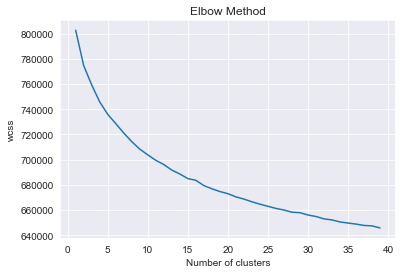

Time to plot: 7.78 mins


In [206]:
#k-means clustering
#Using the elbow method to find the optimum number of clusters
# what are clustering best practices
from sklearn.cluster import KMeans
t = time()
wcss = []
k_size = 40
X = arrays
for i in range(1,k_size):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,k_size),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
print('Time to plot: {} mins'.format(round((time() - t) / 60, 2)))

In [38]:
##Fitting kmeans to the dataset with k=33 (based on user feedback)
t = time()
km4=KMeans(n_clusters= 33,init='k-means++', max_iter=300, n_init=10, random_state=0).fit(arrays)
word_groups1 = km4.labels_
print('Time to cluster: {} mins'.format(round((time() - t) / 60, 2)))
word_groups1.shape

Time to cluster: 0.17 mins


(9095,)

In [209]:
word_groups1

array([16, 29, 17, ...,  4,  3,  5], dtype=int32)

In [39]:
word_groups1

array([16, 29, 17, ...,  4,  3,  5], dtype=int32)

In [211]:
# without scaling 
cluster_2 = word_groups1.tolist()
len(cluster_2)

9095

In [214]:
##Fitting kmeans to the dataset with k=33 (based on user feedback)
t = time()
km4=KMeans(n_clusters= 33,init='k-means++', max_iter=300, n_init=10, random_state=0).fit(arrays1)
word_groups = km4.labels_
print('Time to cluster: {} mins'.format(round((time() - t) / 60, 2)))
word_groups.shape

Time to cluster: 0.23 mins


(9095,)

In [86]:
word_groups

array([28, 14, 27, ...,  4, 13, 22], dtype=int32)

In [215]:
word_groups

array([28, 14, 27, ...,  4, 13, 22], dtype=int32)

In [87]:
#word_groups (original reference)
# array([17,  3, 17, ...,  1, 10, 17], dtype=int32)

In [88]:
#Dim Reduction
t = time()
# Use standard scalar on word vector arrays before dimensionality reduction
# why? read: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# arrays1 = StandardScaler().fit_transform(arrays)

# Reduces the dimensionality from 300 to 50 dimensions/ 0.999 of variance with PCA (use multiprocesser to speed up!)
# check for cpu utilization, perform multi threading
arrays2 = PCA(n_components= 50).fit_transform(arrays1)
print('Time to reduce dimensions from 300 to 50 via PCA: {} mins'.format(round((time() - t) / 60, 2)))

# Finds t-SNE coordinates for 2 dimensions
t= time()
Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(arrays2)

print('Time to reduce dimensions from 50 to 2 via TSNE: {} mins'.format(round((time() - t) / 60, 2)))

Y.shape

Time to reduce dimensions from 300 to 50 via PCA: 0.0 mins
Time to reduce dimensions from 50 to 2 via TSNE: 1.69 mins


(9095, 2)

In [89]:
np.std(Y), np.mean(Y)

(41.114666, -0.026805755)

In [90]:
Y_scaled = StandardScaler().fit_transform(Y)

In [91]:
np.std(Y_scaled), np.mean(Y_scaled)

(0.99999946, -3.3554237e-09)

In [92]:
Y[0], Y_scaled[0]

(array([-24.867853,   8.891757], dtype=float32),
 array([-0.64895606,  0.20368542], dtype=float32))

In [93]:
x = Y_scaled[:, 0]
y = Y_scaled[:, 1]
x, y

(array([-0.64895606, -1.650242  , -0.44979802, ...,  0.4176862 ,
         1.6575154 , -0.5596931 ], dtype=float32),
 array([ 0.20368542, -0.45408025, -0.15769915, ..., -1.5382979 ,
         1.071876  , -0.75746995], dtype=float32))

In [95]:
t = time()
model = W2V_model
word_filters = []
word_labels = []
target_word  = []
proximity_score = []
count = 1.0

for word in model.wv.vocab:
#     print(word,'||','time_now:{} mins'.format(round((time() - t) / 60, 2)),'||', '{}% Completed'.format(round(100.0 * count / float(len(model.wv.vocab)))))
    # adds the vector of the query word
    word_filters.append(word)
    word_labels.append(word)
    target_word.append(1)
    proximity_score.append(1.0)

    # gets list of most similar words (seperate analysis for others: capture top 50)
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        word_filters.append(word)
        word_labels.append(wrd_score[0])
        target_word.append(0)
        proximity_score.append(wrd_score[1])
    
    count += 1
    

print('Time to build top similarity frame: {} mins'.format(round((time() - t) / 60, 2)))
print(count, len(word_labels), len(target_word), len(proximity_score))

Time to build top similarity frame: 0.16 mins
9096.0 100045 100045 100045


In [96]:
# dataset for associations
df_words_associations = pd.DataFrame({'word_filters': word_filters,
                   'word': word_labels,
                   'is_target_word': target_word,
                   'proximity_score': proximity_score})
df_words_associations.head(20)

,word_filters,word,is_target_word,proximity_score
0,engagement,engagement,1,1.000000
1,engagement,engage,0,0.604757
2,engagement,appointment,0,0.472092
3,engagement,appoint,0,0.464373
4,engagement,appointment_panel,0,0.424004
5,engagement,provision,0,0.410325
6,engagement,engage_external,0,0.405267
7,engagement,hire,0,0.393758
8,engagement,employ,0,0.385450
9,engagement,conduct,0,0.377769


In [97]:
df_words_associations.shape

(100045, 4)

In [216]:
# dataset for geography
df_words_geography = pd.DataFrame({'word': df_words_associations[df_words_associations.is_target_word == 1]['word'],
                   'x': x.tolist(),
                   'y': y.tolist(),
                   'cluster': word_groups.tolist()}).reset_index(drop=True)
df_words_geography.head()

,word,x,y,cluster
0,engagement,-0.648956,0.203685,28
1,video_recording,-1.650242,-0.454080,14
2,service,-0.449798,-0.157699,27
3,seminar,-0.041923,0.727661,20
4,jan,0.808144,1.661787,25


In [217]:
df_words_geography.tail()

,word,x,y,cluster
9090,list_breakdown,1.573748,0.666359,15
9091,price_gebiz,1.574257,0.667242,13
9092,twqo,0.417686,-1.538298,4
9093,joshua_sng,1.657515,1.071876,13
9094,meterial,-0.559693,-0.757470,22


In [218]:
df_words_geography.shape

(9095, 4)

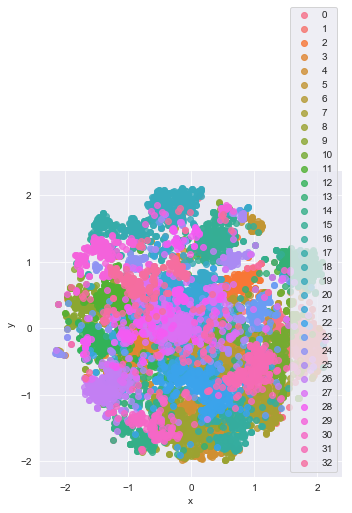

In [219]:
# Vizualize Clusters

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="x", y="y", data=df_words_geography, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [220]:
# add cluster_2
df_words_geography['cluster_2'] = cluster_2

In [222]:
df_words_geography.head()

,word,x,y,cluster,cluster_2
0,engagement,-0.648956,0.203685,28,16
1,video_recording,-1.650242,-0.454080,14,29
2,service,-0.449798,-0.157699,27,17
3,seminar,-0.041923,0.727661,20,13
4,jan,0.808144,1.661787,25,23


In [223]:
df_words_geography.tail()

,word,x,y,cluster,cluster_2
9090,list_breakdown,1.573748,0.666359,15,10
9091,price_gebiz,1.574257,0.667242,13,3
9092,twqo,0.417686,-1.538298,4,4
9093,joshua_sng,1.657515,1.071876,13,3
9094,meterial,-0.559693,-0.757470,22,5


In [131]:
df_prev = pd.read_csv('procurement_word2vec_output_2.csv')
df_prev.shape

(88781, 8)

In [132]:
df_prev_words = df_prev[df_prev.is_target_word == 1].word.tolist()
type(df_prev_words), len(df_prev_words)

(list, 8071)

In [133]:
df_new_words = df_words_geography.word.tolist()
type(df_new_words), len(df_new_words)

(list, 9095)

In [134]:
new_word_list = []

for word in df_new_words:
    if word in df_prev_words:
        new_word_list.append(0)
    else:
        new_word_list.append(1)
len(new_word_list)

9095

In [224]:
df_words_geography['new_word'] = new_word_list

In [225]:
df_words_geography.head()

,word,x,y,cluster,cluster_2,new_word
0,engagement,-0.648956,0.203685,28,16,0
1,video_recording,-1.650242,-0.454080,14,29,0
2,service,-0.449798,-0.157699,27,17,0
3,seminar,-0.041923,0.727661,20,13,0
4,jan,0.808144,1.661787,25,23,0


In [226]:
df_words_geography.shape

(9095, 6)

In [242]:
df_words_geography.cluster.value_counts(ascending = False)

8     481
27    465
6     451
21    399
3     393
19    385
22    372
13    364
26    337
15    331
10    306
14    306
11    297
31    284
16    283
32    274
1     271
4     270
9     248
7     244
12    242
0     238
29    236
2     232
23    210
18    175
17    173
28    172
25    155
30    149
20    138
24    133
5     81 
Name: cluster, dtype: int64

In [241]:
df_words_geography.cluster_2.value_counts(ascending = False)

29    469
19    466
22    431
17    418
16    412
14    396
1     392
4     372
3     366
27    359
6     358
20    322
25    313
9     301
10    291
32    290
28    280
12    270
31    266
5     265
21    248
7     245
26    235
2     222
15    215
24    180
13    161
8     153
11    150
23    132
18    61 
30    55 
0     1  
Name: cluster_2, dtype: int64

In [227]:
df_words_geography[df_words_geography.new_word == 1].head()

,word,x,y,cluster,cluster_2,new_word
15,malan_road,1.506544,0.126475,10,32,1
101,singapore_mlcs,-1.956846,0.376513,9,5,1
140,corporate_folder,-1.340026,-0.224388,12,5,1
246,workload,-1.152423,-0.697570,26,6,1
261,china_ticket,0.718190,0.702261,2,7,1


In [228]:
df_words_geography[df_words_geography.new_word == 1].shape

(1133, 6)

In [229]:
#which groups accounts for most new words?
df_words_geography[df_words_geography.new_word == 1].cluster.value_counts(ascending=False)

6     104
13    94 
27    69 
8     59 
21    57 
26    48 
4     45 
14    44 
2     41 
10    40 
3     37 
15    36 
9     35 
1     35 
32    33 
22    33 
7     32 
31    32 
23    31 
12    28 
16    28 
0     28 
29    27 
11    24 
17    17 
19    17 
30    16 
20    12 
28    10 
18    9  
24    6  
25    4  
5     2  
Name: cluster, dtype: int64

In [230]:
# no of words existed in old but not in new
1133 -(9095-8071)

109

In [231]:
test_list_new = df_words_geography[df_words_geography.new_word == 1].word.tolist()
type(test_list_new), len(test_list_new)

(list, 1133)

In [232]:
test_list_new

['malan_road',
 'singapore_mlcs',
 'corporate_folder',
 'workload',
 'china_ticket',
 'bhangra',
 'condition_contract',
 'total_session',
 'wef_jan',
 'educational_gymnastic',
 'completely_fill',
 'lianhe_zaobao',
 'engage_external',
 'entrance_fee',
 'proofread',
 'choir_conductor',
 'hao',
 'bao',
 'thumb',
 'yps_quotation',
 'pastoral',
 'present_perfect',
 'costing',
 'hairstyling',
 'stipulate',
 'namecard',
 'barcode_scanner',
 'pam',
 'automatic_lightning',
 'risk_alert',
 'warn_system',
 'elite',
 'idp',
 'condemnation',
 'math_problem',
 'sum',
 'mcy',
 'vendor_submit',
 'particular',
 'away',
 'self_awareness',
 'annex_bidding',
 'concurrently',
 'extensive',
 'excellence_award',
 'look_company',
 'performing',
 'cheer',
 'swimsafer_swimming',
 'peiy_pri',
 'fulfil',
 'troupe',
 'daniel',
 'kuan',
 'fundamental_movement',
 'relevant_experience',
 'skating',
 'possess',
 'differentiated_instruction',
 'span',
 'self_esteem',
 'observe',
 'intructor',
 'montfort',
 'cultivation

In [233]:
test_list_old = []

for word in df_prev_words:
    if word not in df_new_words:
        test_list_old.append(word)

len(test_list_old)

109

In [234]:
test_list_old

['malan',
 'mlcs',
 'specification_attach',
 'completely',
 'lianhe',
 'zaobao',
 'tennis_cca',
 'volleyball_cca',
 'george',
 'warn',
 'engage_vendor',
 'detail_pls',
 'esteem',
 'differentiated',
 'music_lesson',
 'house_printing',
 'town_secondary',
 'dance_cca',
 'beacon_primary',
 'experienced_coach',
 'video_production',
 'complete_submit',
 'inventor',
 'vendor_meet',
 'telling',
 'approximately_pupil',
 'design_thinking',
 'indemnity',
 'cum_trainer',
 'zoological_garden',
 'old_ford',
 'peristaltic',
 'excavator',
 'spine',
 'arborist',
 'lucky',
 'deliver_commission',
 'rechargeable',
 'street_police',
 'edmund',
 'laboratory_use',
 'memo',
 'university_ntu',
 'lhp',
 'electron_microscope',
 'incinerator',
 'schedule_statement',
 'work_amend',
 'subject_general',
 'desktop_printer',
 'pagar',
 'team_cert',
 'outboard',
 'communication_technology',
 'contact_chiang',
 'lee_keau',
 'employability',
 'bingyan',
 'jelena',
 'hvls',
 'prince',
 'information_technology',
 'user_lic

In [235]:
# by comparing words new and old, raw word is not lost, only older phrases maybe lost
counter = 0
for phrase in test_list_old:
    lookup_word = phrase.split("_")[0]
#     print(lookup_word)
    count_new = 0
    count_old = 0
    for word in df_new_words:
        if lookup_word in word:
    #         print('new:', word)
            count_new += 1
    for word in df_prev_words:
        if lookup_word in word:
    #         print('old:', word)
            count_old += 1

    if count_new > count_old:
        print(lookup_word)
        counter += 1
counter, counter/len(test_list_old)

engage
design
old
laboratory
memo
electron
work
team
communication
lee
user
pol
ave
ken
payment


(15, 0.13761467889908258)

In [248]:
# by comparing words new and old, raw word is not lost, only older phrases maybe lost
lookup_word = 'telling'
count_new = 0
count_old = 0
list_new = []
list_old = []
for word in df_new_words:
    if lookup_word in word:
        print('new:', word)
        list_new.append(word)
        count_new += 1
for word in df_prev_words:
    if lookup_word in word:
        print('old:', word)
        list_old.append(word)
        count_old += 1
count_new, count_old, 'in old not in new:',list(set(list_old) - set(list_new)), 'in new not in old:',list(set(list_new) - set(list_old))

new: storytelling
new: story_telling
old: storytelling
old: telling


(2,
 2,
 'in old not in new:',
 ['telling'],
 'in new not in old:',
 ['story_telling'])

In [237]:
#merge data set
df_full = pd.merge(df_words_associations, df_words_geography, how='left', on=['word'])
df_full.head(20)

,word_filters,word,is_target_word,proximity_score,x,y,cluster,cluster_2,new_word
0,engagement,engagement,1,1.000000,-0.648956,0.203685,28,16,0
1,engagement,engage,0,0.604757,-0.236503,1.350298,28,9,0
2,engagement,appointment,0,0.472092,-0.142973,0.485635,28,17,0
3,engagement,appoint,0,0.464373,-0.139420,0.480227,28,17,0
4,engagement,appointment_panel,0,0.424004,-0.133235,0.471711,28,17,0
5,engagement,provision,0,0.410325,-0.298554,1.480558,28,17,0
6,engagement,engage_external,0,0.405267,-0.274829,1.304563,28,21,1
7,engagement,hire,0,0.393758,-0.318998,1.634421,17,1,0
8,engagement,employ,0,0.385450,-0.663324,1.619634,17,11,0
9,engagement,conduct,0,0.377769,-1.224839,0.882213,11,16,0


In [238]:
df_full.shape, df_full.shape[0]/11

((100045, 9), 9095.0)

In [239]:
# export to csv for tableau viz
df_full.to_csv('procurement_word2vec_output_3.csv', index=False)

**t-SNE visualizations:**<br>
t-SNE is a non-linear dimensionality reduction algorithm that attempts to represent high-dimensional data and the underlying relationships between vectors in a lower-dimensional space.
Here is a good tutorial on it: https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [282]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [63]:
model = W2V_model
word = 'homer'
list_names = ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff']


arrays = np.empty((0, 300), dtype='f')
word_labels = [word]
color_list  = ['red']

# adds the vector of the query word
arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

# gets list of most similar words
close_words = model.wv.most_similar([word])

# adds the vector for each of the closest words to the array
for wrd_score in close_words:
    wrd_vector = model.wv.__getitem__([wrd_score[0]])
    word_labels.append(wrd_score[0])
    color_list.append('blue')
    arrays = np.append(arrays, wrd_vector, axis=0)

# adds the vector for each of the words from list_names to the array
for wrd in list_names:
    wrd_vector = model.wv.__getitem__([wrd])
    word_labels.append(wrd)
    color_list.append('green')
    arrays = np.append(arrays, wrd_vector, axis=0)

print(type(arrays), arrays.shape)
# Reduces the dimensionality from 300 to 50 dimensions with PCA
# reduc = PCA(n_components=50).fit_transform(arrays)


<class 'numpy.ndarray'> (19, 300)


PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [64]:
reduc = PCA(n_components= 0.999).fit_transform(arrays)

In [65]:
reduc.shape

(19, 17)

t-SNE: https://www.datacamp.com/community/tutorials/introduction-t-sne

In [66]:
Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

In [67]:
Y.shape

(19, 2)

Our goal in this section is **to plot our 300 dimensions vectors into 2 dimensional graphs**, and see if we can spot interesting patterns.

For that we are going to use t-SNE implementation from scikit-learn.

To make the visualizations more relevant, we will look at the relationships between a query word (in <font color=red>**red**</font>), its most similar words in the model (in <font color=blue>**blue**</font>), and other words from the vocabulary (in <font color=green>**green**</font>).

In [283]:
def tsnescatterplot(model, word, list_names, pca):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']
    proximity_score = [1.0]
    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        proximity_score.append(wrd_score[1])
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        proximity = model.wv.similarity(word, wrd)
        proximity_score.append(proximity)
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    if pca == 1:
        reduc = PCA(n_components= 0.999).fit_transform(arrays)
    else:
        reduc = arrays
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'score': proximity_score,
                       'color': color_list})
    print(df)
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

**10 Most similar words vs. 8 Random words:**<br>
Let's compare where the vector representation of Homer, his 10 most similar words from the model, as well as 8 random ones, lies in a 2D graph:

             x           y                    words     score  color
0   185.629364  -56.813095         event_management  1.000000    red
1    48.095764  217.493240                    event  0.604570   blue
2    84.772964 -174.066895          event_organiser  0.565624   blue
3    24.025717  -26.684410          organise_manage  0.535963   blue
4   -63.354126 -139.432205               ordination  0.494491   blue
5  -122.079811  242.118164         opening_ceremony  0.491964   blue
6   115.552284   81.557503                logistics  0.482123   blue
7   -35.487621 -320.394226                 logistic  0.467247   blue
8  -142.814850  -26.142900       planning_execution  0.463420   blue
9  -201.732803 -199.952408       logistical_support  0.463290   blue
10 -198.192505  104.351952  marketing_communication  0.459709   blue
11 -339.421082  -28.578300               instructor -0.056656  green
12  316.783844  161.819717           junior_college  0.016747  green
13  -43.733265   97.592293        

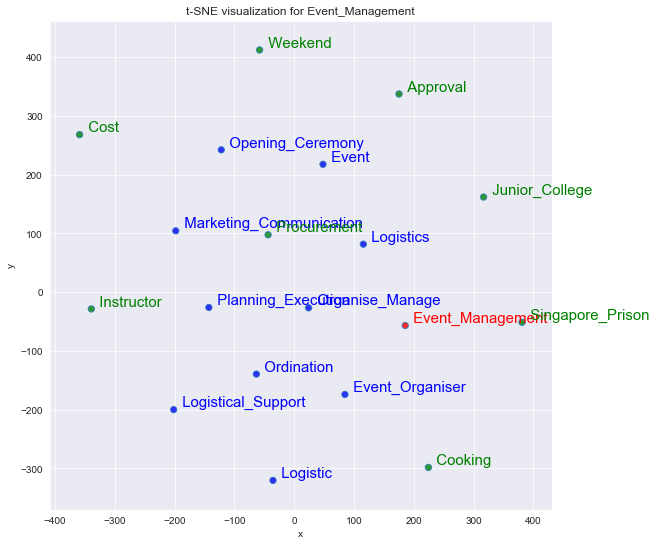

In [289]:
tsnescatterplot(W2V_model, 'event_management', ['instructor', 'junior_college', 'procurement', 'singapore_prison', 'cooking', 'approval', 'weekend', 'cost'],1)

**10 Most similar words vs. 10 Most dissimilar**<br>
This time, let's compare where the vector representation of Maggie and her 10 most similar words from the model lies compare to the vector representation of the 10 most dissimilar words to Maggie:

             x           y                       words     score  color
0   103.344894   39.844952                  instructor  1.000000    red
1   134.567307  102.621071                       coach  0.740094   blue
2   163.151459   32.839382                   programme  0.681479   blue
3    25.234589   44.584953                   instuctor  0.673102   blue
4    67.397232   95.111740                         cca  0.645780   blue
5   197.610031  -31.219900                  coach_week  0.593268   blue
6    50.603012   -6.326497                  curricular  0.577145   blue
7    94.949821  159.730469              main_assistant  0.569617   blue
8   116.423698  -37.860626       professional_coaching  0.560481   blue
9    15.488900  135.527084                cca_training  0.556571   blue
10  207.668762   82.303093        enrichment_programme  0.556158   blue
11   -6.749162 -103.612022                         ahu -0.389339  green
12 -106.103188  -27.940228                      system -0.375535

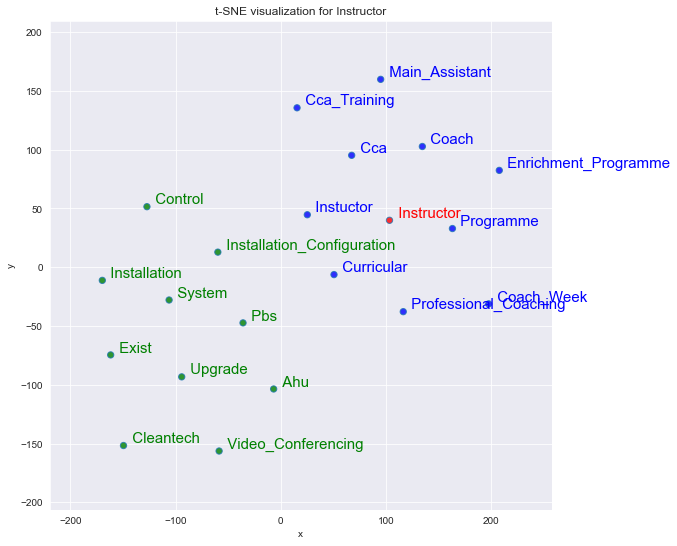

In [293]:
# highlight importance of quality: instuctor as misspelling
tsnescatterplot(W2V_model, 'instructor', [i[0] for i in W2V_model.wv.most_similar(negative=["instructor"])], 1)

**10 Most similar words vs. 11th to 20th Most similar words:** <br>
Finally, we are going to plot the most similar words to Mr. Burns ranked 1st to 10th versus the ones ranked 11th to 20th:

(PS: Mr. Burns became mr_burn after the preprocessing)

             x           y                  words     score  color
0  -204.750519   -9.737394                cooking  1.000000    red
1    95.736740  -45.568943                   cook  0.599212   blue
2   -22.043585  -80.720161       bonding_activity  0.542964   blue
3  -127.225311   85.438881                 baking  0.502312   blue
4  -171.814865 -136.305206               trekking  0.471709   blue
5    40.557739  192.445923         food_nutrition  0.454358   blue
6  -109.011032  -60.853573          staff_bonding  0.453071   blue
7  -116.299850  179.764084                   bake  0.448189   blue
8    26.969305 -157.142136              orienteer  0.431188   blue
9   -75.587929 -149.045639              paintball  0.427916   blue
10  169.786118   69.497528             ingredient  0.425024   blue
11  120.972221  251.348862          home_economic  0.420910  green
12  109.812447  147.845917                    fce  0.417946  green
13  195.497925  179.447052          food_consumer  0.415679  g

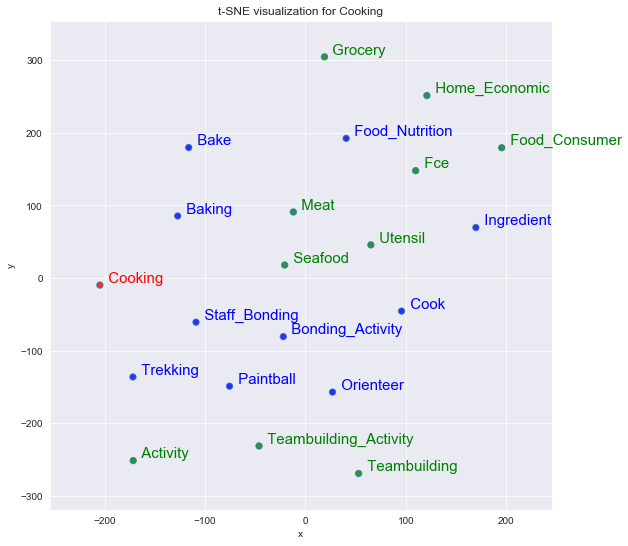

In [295]:
tsnescatterplot(W2V_model, "cooking", [t[0] for t in W2V_model.wv.most_similar(positive=["cooking"], topn=20)][10:],1)

**Create Dataframe for Tableau Viz** <br>

Df to contain the following columns:
    1. word
    2. X-coordinate
    3. Y-coordinate
    4. Target word (boolean)
    5. Proximity score of Neighbour word in relation to Target word
    6. Procurement segment
    7. Cluster

In [296]:
model = W2V_model
words = []
for word in model.wv.vocab: 
    words.append(word)
len(words)   

7849

In [303]:
t = time()

model = W2V_model
# word = 'homer'

arrays = np.empty((0, 300), dtype='f')
word_filters = []
word_labels = []
target_word  = []
proximity_score = []
count = 1.0
for word in model.wv.vocab:
    print(word,'||','time_now:{} mins'.format(round((time() - t) / 60, 2)),'||', '{}% Completed'.format(round(100.0 * count / float(len(model.wv.vocab)))))
    # adds the vector of the query word
    word_filters.append(word)
    word_labels.append(word)
    target_word.append(1)
    proximity_score.append(1.0)
    wrd_vector = model.wv.__getitem__([word])
    arrays = np.append(arrays, wrd_vector, axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        word_filters.append(word)
        word_labels.append(wrd_score[0])
        target_word.append(0)
        proximity_score.append(wrd_score[1])
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    count += 1
    
# Use standard scalar on word vector arrays before dimensionality reduction
# why? read: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# arrays = StandardScaler().fit_transform(arrays)

#cluster at 300 dimensions instead of 2 dimensions for better groups, then viz at 2d

# Reduces the dimensionality from 300 to 50 dimensions/ 0.999 of variance with PCA (use multiprocesser to speed up!)
# check for cpu utilization, perform multi threading
reduc = PCA(n_components= 50).fit_transform(arrays)

# Finds t-SNE coordinates for 2 dimensions
Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
print(arrays.shape, len(word_labels), len(target_word), len(proximity_score))

df_words = pd.DataFrame({'word_filters': word_filters,
                   'word': word_labels,
                   'x': [x for x in Y[:, 0]],
                   'y': [y for y in Y[:, 1]],
                   'is_target_word': target_word,
                   'proximity_score': proximity_score})
df_words[df_words.word_filters == 'instructor']

engagement || time_now:0.0 mins || 0% Completed
video_recording || time_now:0.0 mins || 0% Completed
service || time_now:0.0 mins || 0% Completed
seminar || time_now:0.0 mins || 0% Completed
jan || time_now:0.0 mins || 0% Completed
invitation_quote || time_now:0.0 mins || 0% Completed
supply || time_now:0.0 mins || 0% Completed
install || time_now:0.0 mins || 0% Completed
stainless_steel || time_now:0.0 mins || 0% Completed
file || time_now:0.0 mins || 0% Completed
holder || time_now:0.0 mins || 0% Completed
inside || time_now:0.0 mins || 0% Completed
toilet || time_now:0.0 mins || 0% Completed
cubicle || time_now:0.0 mins || 0% Completed
malan || time_now:0.0 mins || 0% Completed
road || time_now:0.0 mins || 0% Completed
singapore || time_now:0.0 mins || 0% Completed
printing || time_now:0.0 mins || 0% Completed
delivery || time_now:0.0 mins || 0% Completed
moe || time_now:0.0 mins || 0% Completed
long || time_now:0.0 mins || 0% Completed
award || time_now:0.0 mins || 0% Completed
cer

emergency || time_now:0.03 mins || 2% Completed
officer || time_now:0.03 mins || 2% Completed
collection || time_now:0.03 mins || 2% Completed
datum_entry || time_now:0.03 mins || 2% Completed
project || time_now:0.03 mins || 2% Completed
computerised || time_now:0.03 mins || 2% Completed
adaptive || time_now:0.03 mins || 2% Completed
testing || time_now:0.03 mins || 2% Completed
illustration || time_now:0.03 mins || 2% Completed
preschool || time_now:0.03 mins || 2% Completed
english || time_now:0.03 mins || 3% Completed
mock || time_now:0.03 mins || 3% Completed
story_book || time_now:0.03 mins || 3% Completed
guideline || time_now:0.04 mins || 3% Completed
package || time_now:0.04 mins || 3% Completed
lower || time_now:0.04 mins || 3% Completed
malay || time_now:0.04 mins || 3% Completed
magazine || time_now:0.04 mins || 3% Completed
renewal || time_now:0.04 mins || 3% Completed
maintenance || time_now:0.04 mins || 3% Completed
fully_operational || time_now:0.04 mins || 3% Completed

chinese_dance || time_now:0.09 mins || 5% Completed
costume_syf || time_now:0.09 mins || 5% Completed
attachment_detail || time_now:0.09 mins || 5% Completed
hockey || time_now:0.09 mins || 5% Completed
cum || time_now:0.09 mins || 5% Completed
floorball_cca || time_now:0.09 mins || 5% Completed
boy || time_now:0.09 mins || 5% Completed
casuarina_primary || time_now:0.09 mins || 5% Completed
option || time_now:0.09 mins || 5% Completed
mission || time_now:0.09 mins || 5% Completed
girl || time_now:0.09 mins || 5% Completed
assistant || time_now:0.09 mins || 5% Completed
base || time_now:0.09 mins || 5% Completed
start || time_now:0.09 mins || 5% Completed
november || time_now:0.09 mins || 5% Completed
december || time_now:0.09 mins || 5% Completed
extend || time_now:0.09 mins || 5% Completed
refer || time_now:0.1 mins || 5% Completed
item || time_now:0.1 mins || 5% Completed
string || time_now:0.1 mins || 5% Completed
cello || time_now:0.1 mins || 5% Completed
bukit_view || time_now:0.

enrichment_programme || time_now:0.18 mins || 7% Completed
curricular_activity || time_now:0.18 mins || 7% Completed
chij_katong || time_now:0.18 mins || 7% Completed
choir_pianist || time_now:0.18 mins || 7% Completed
contemporary_dance || time_now:0.18 mins || 7% Completed
skip || time_now:0.18 mins || 7% Completed
recreational || time_now:0.18 mins || 7% Completed
bowling || time_now:0.18 mins || 7% Completed
tablet || time_now:0.18 mins || 7% Completed
management || time_now:0.18 mins || 7% Completed
cart || time_now:0.19 mins || 7% Completed
swimming || time_now:0.19 mins || 7% Completed
track_field || time_now:0.19 mins || 7% Completed
customize || time_now:0.19 mins || 7% Completed
river_valley || time_now:0.19 mins || 7% Completed
mathematic || time_now:0.19 mins || 7% Completed
low || time_now:0.19 mins || 7% Completed
estimate || time_now:0.19 mins || 7% Completed
upper || time_now:0.19 mins || 7% Completed
div || time_now:0.19 mins || 7% Completed
northland || time_now:0.19 

worksheet || time_now:0.3 mins || 9% Completed
exam || time_now:0.3 mins || 9% Completed
cod || time_now:0.3 mins || 9% Completed
password || time_now:0.3 mins || 9% Completed
tracking || time_now:0.3 mins || 9% Completed
purpose || time_now:0.3 mins || 9% Completed
refer_attachement || time_now:0.3 mins || 9% Completed
consideration || time_now:0.3 mins || 9% Completed
cyberwellness || time_now:0.3 mins || 9% Completed
content || time_now:0.3 mins || 9% Completed
facilitation || time_now:0.3 mins || 9% Completed
new_town || time_now:0.3 mins || 9% Completed
extension || time_now:0.3 mins || 9% Completed
xingnan_pri || time_now:0.31 mins || 9% Completed
speech || time_now:0.31 mins || 9% Completed
communication_skill || time_now:0.31 mins || 9% Completed
speaking || time_now:0.31 mins || 9% Completed
montfort_junior || time_now:0.31 mins || 9% Completed
ict_trainer || time_now:0.31 mins || 9% Completed
ict_executive || time_now:0.31 mins || 9% Completed
str_ensemble || time_now:0.31 mi

yearly_basis || time_now:0.48 mins || 11% Completed
provide_broadrick || time_now:0.48 mins || 11% Completed
monday || time_now:0.48 mins || 11% Completed
hrs || time_now:0.48 mins || 11% Completed
estimate_number || time_now:0.48 mins || 11% Completed
enrichment || time_now:0.48 mins || 11% Completed
generate || time_now:0.48 mins || 11% Completed
cad || time_now:0.48 mins || 11% Completed
final || time_now:0.49 mins || 11% Completed
presentation || time_now:0.49 mins || 11% Completed
board || time_now:0.49 mins || 11% Completed
rosyth || time_now:0.49 mins || 11% Completed
flute || time_now:0.49 mins || 11% Completed
evergreen || time_now:0.49 mins || 11% Completed
zhenghua || time_now:0.49 mins || 11% Completed
kindly_refer || time_now:0.49 mins || 11% Completed
specification_sheet || time_now:0.49 mins || 11% Completed
pioneer || time_now:0.49 mins || 11% Completed
sec_normal || time_now:0.5 mins || 12% Completed
technical || time_now:0.5 mins || 12% Completed
refer_attached || tim

declaration || time_now:0.64 mins || 13% Completed
form || time_now:0.65 mins || 13% Completed
price_proposal || time_now:0.65 mins || 13% Completed
doc || time_now:0.65 mins || 13% Completed
certify || time_now:0.65 mins || 14% Completed
qualification_experience || time_now:0.65 mins || 14% Completed
additional || time_now:0.65 mins || 14% Completed
organise_conduct || time_now:0.65 mins || 14% Completed
learning_journey || time_now:0.65 mins || 14% Completed
kampong_glam || time_now:0.65 mins || 14% Completed
creative_writing || time_now:0.66 mins || 14% Completed
guitar_ensemble || time_now:0.66 mins || 14% Completed
expect || time_now:0.66 mins || 14% Completed
come || time_now:0.66 mins || 14% Completed
tournament || time_now:0.66 mins || 14% Completed
assistance || time_now:0.66 mins || 14% Completed
thursday || time_now:0.66 mins || 14% Completed
chong || time_now:0.66 mins || 14% Completed
enquiry || time_now:0.66 mins || 14% Completed
desk_chair || time_now:0.67 mins || 14% Co

interview || time_now:0.84 mins || 16% Completed
etiquette_workshop || time_now:0.84 mins || 16% Completed
international_chess || time_now:0.84 mins || 16% Completed
instructional_coaching || time_now:0.85 mins || 16% Completed
till || time_now:0.85 mins || 16% Completed
whichev || time_now:0.85 mins || 16% Completed
serangoon_junior || time_now:0.85 mins || 16% Completed
draw || time_now:0.85 mins || 16% Completed
deyi_secondary || time_now:0.85 mins || 16% Completed
ingredient || time_now:0.85 mins || 16% Completed
practical_lesson || time_now:0.85 mins || 16% Completed
volleyball_girl || time_now:0.86 mins || 16% Completed
clay || time_now:0.86 mins || 16% Completed
sculpture || time_now:0.86 mins || 16% Completed
bedok_green || time_now:0.86 mins || 16% Completed
professional_coaching || time_now:0.86 mins || 16% Completed
marist || time_now:0.86 mins || 16% Completed
judo || time_now:0.86 mins || 16% Completed
inspire || time_now:0.86 mins || 16% Completed
wire_sculpture || time_n

facilitate || time_now:1.07 mins || 18% Completed
grand || time_now:1.07 mins || 18% Completed
finale || time_now:1.08 mins || 18% Completed
bear || time_now:1.08 mins || 18% Completed
associate || time_now:1.08 mins || 18% Completed
ethnic || time_now:1.08 mins || 18% Completed
fusion_dance || time_now:1.08 mins || 18% Completed
interdisciplinary || time_now:1.08 mins || 18% Completed
resident || time_now:1.08 mins || 18% Completed
administrator || time_now:1.09 mins || 18% Completed
bukit_merah || time_now:1.09 mins || 18% Completed
park_view || time_now:1.09 mins || 18% Completed
invite_vendor || time_now:1.09 mins || 18% Completed
ensemble_cca || time_now:1.09 mins || 18% Completed
literature_appreciation || time_now:1.09 mins || 18% Completed
oracy || time_now:1.1 mins || 18% Completed
cctv_surveillance || time_now:1.1 mins || 18% Completed
residential_ict || time_now:1.1 mins || 18% Completed
fernvale_primary || time_now:1.1 mins || 18% Completed
raise || time_now:1.1 mins || 18%

east_spring || time_now:1.34 mins || 20% Completed
nac_aep || time_now:1.34 mins || 20% Completed
endorse || time_now:1.34 mins || 20% Completed
space || time_now:1.34 mins || 20% Completed
fieldtrip || time_now:1.35 mins || 20% Completed
city || time_now:1.35 mins || 20% Completed
operation_support || time_now:1.35 mins || 20% Completed
female || time_now:1.35 mins || 20% Completed
strong || time_now:1.35 mins || 20% Completed
rhythmic_gymnastic || time_now:1.35 mins || 20% Completed
differentiate || time_now:1.36 mins || 20% Completed
grace || time_now:1.36 mins || 20% Completed
holistic || time_now:1.36 mins || 20% Completed
health || time_now:1.36 mins || 20% Completed
zone || time_now:1.36 mins || 20% Completed
dinner || time_now:1.36 mins || 20% Completed
softball_cca || time_now:1.36 mins || 20% Completed
scientific || time_now:1.37 mins || 20% Completed
concept || time_now:1.37 mins || 20% Completed
toy || time_now:1.37 mins || 20% Completed
questioning || time_now:1.37 mins ||

red || time_now:1.64 mins || 22% Completed
dot || time_now:1.64 mins || 22% Completed
reading_material || time_now:1.64 mins || 22% Completed
compilation || time_now:1.64 mins || 22% Completed
montage || time_now:1.65 mins || 22% Completed
conceptualisation_design || time_now:1.65 mins || 22% Completed
plate || time_now:1.65 mins || 22% Completed
door_access || time_now:1.65 mins || 22% Completed
control || time_now:1.65 mins || 22% Completed
geographic || time_now:1.66 mins || 22% Completed
explorer || time_now:1.66 mins || 22% Completed
entire || time_now:1.66 mins || 22% Completed
canon || time_now:1.66 mins || 22% Completed
duplex || time_now:1.66 mins || 22% Completed
toner || time_now:1.66 mins || 22% Completed
nature_reserve || time_now:1.67 mins || 22% Completed
responsible || time_now:1.67 mins || 22% Completed
fengshan || time_now:1.67 mins || 22% Completed
sungei_buloh || time_now:1.67 mins || 22% Completed
wetland_reserve || time_now:1.67 mins || 22% Completed
conducive || 

basic_enhanced || time_now:1.98 mins || 24% Completed
experienced_coach || time_now:1.98 mins || 24% Completed
opera || time_now:1.98 mins || 24% Completed
fri || time_now:1.98 mins || 24% Completed
morning || time_now:1.99 mins || 24% Completed
separately || time_now:1.99 mins || 24% Completed
insurance_policy || time_now:1.99 mins || 24% Completed
value || time_now:1.99 mins || 24% Completed
report || time_now:1.99 mins || 24% Completed
designer || time_now:2.0 mins || 24% Completed
bassoon || time_now:2.0 mins || 24% Completed
french || time_now:2.0 mins || 24% Completed
horn || time_now:2.0 mins || 24% Completed
saxophone || time_now:2.01 mins || 24% Completed
sajc || time_now:2.01 mins || 24% Completed
rest || time_now:2.01 mins || 24% Completed
christ_church || time_now:2.01 mins || 24% Completed
ukelele || time_now:2.01 mins || 24% Completed
prefect || time_now:2.02 mins || 25% Completed
lau || time_now:2.02 mins || 25% Completed
teo || time_now:2.02 mins || 25% Completed
hurdle

experiential_learning || time_now:2.35 mins || 26% Completed
aircon || time_now:2.36 mins || 26% Completed
attach_document || time_now:2.36 mins || 27% Completed
letter || time_now:2.36 mins || 27% Completed
explore || time_now:2.36 mins || 27% Completed
creativity || time_now:2.37 mins || 27% Completed
tentative || time_now:2.37 mins || 27% Completed
lee || time_now:2.37 mins || 27% Completed
cricket || time_now:2.37 mins || 27% Completed
african || time_now:2.37 mins || 27% Completed
plucking || time_now:2.38 mins || 27% Completed
lim || time_now:2.38 mins || 27% Completed
rock || time_now:2.38 mins || 27% Completed
wong || time_now:2.38 mins || 27% Completed
derrick || time_now:2.39 mins || 27% Completed
meal || time_now:2.39 mins || 27% Completed
ticket || time_now:2.39 mins || 27% Completed
south_korea || time_now:2.39 mins || 27% Completed
target || time_now:2.4 mins || 27% Completed
rehearsal || time_now:2.4 mins || 27% Completed
oral_presentation || time_now:2.4 mins || 27% Com

spice || time_now:2.79 mins || 29% Completed
orchid || time_now:2.79 mins || 29% Completed
butterfly_garden || time_now:2.79 mins || 29% Completed
weak || time_now:2.8 mins || 29% Completed
learner || time_now:2.8 mins || 29% Completed
koi_pond || time_now:2.8 mins || 29% Completed
frequency || time_now:2.8 mins || 29% Completed
nac_endorse || time_now:2.81 mins || 29% Completed
accompanist || time_now:2.81 mins || 29% Completed
track || time_now:2.81 mins || 29% Completed
dunman || time_now:2.81 mins || 29% Completed
tie || time_now:2.82 mins || 29% Completed
johor || time_now:2.82 mins || 29% Completed
malaysia || time_now:2.82 mins || 29% Completed
johor_malaysia || time_now:2.82 mins || 29% Completed
life_skill || time_now:2.83 mins || 29% Completed
sel || time_now:2.83 mins || 29% Completed
balance || time_now:2.83 mins || 29% Completed
career_guidance || time_now:2.83 mins || 29% Completed
talent || time_now:2.84 mins || 29% Completed
inventor || time_now:2.84 mins || 29% Complet

yrs || time_now:3.3 mins || 31% Completed
boom || time_now:3.31 mins || 31% Completed
studio || time_now:3.31 mins || 31% Completed
pilot || time_now:3.31 mins || 31% Completed
practitioner || time_now:3.31 mins || 31% Completed
cooking || time_now:3.32 mins || 31% Completed
battery_pack || time_now:3.32 mins || 31% Completed
adapter || time_now:3.32 mins || 31% Completed
highly || time_now:3.32 mins || 31% Completed
committed || time_now:3.33 mins || 31% Completed
competent || time_now:3.33 mins || 31% Completed
accredit || time_now:3.33 mins || 31% Completed
association || time_now:3.34 mins || 31% Completed
late || time_now:3.34 mins || 31% Completed
tae || time_now:3.34 mins || 31% Completed
photocopy || time_now:3.34 mins || 31% Completed
draft || time_now:3.35 mins || 31% Completed
artistic || time_now:3.35 mins || 31% Completed
holiday || time_now:3.35 mins || 31% Completed
selection || time_now:3.35 mins || 31% Completed
choreography || time_now:3.36 mins || 31% Completed
home 

electric || time_now:3.9 mins || 33% Completed
cooker || time_now:3.9 mins || 33% Completed
oven || time_now:3.9 mins || 33% Completed
loh || time_now:3.91 mins || 33% Completed
ver || time_now:3.91 mins || 33% Completed
yih || time_now:3.91 mins || 33% Completed
wearable || time_now:3.91 mins || 33% Completed
cornet || time_now:3.92 mins || 33% Completed
fiction || time_now:3.92 mins || 33% Completed
restore || time_now:3.92 mins || 33% Completed
cam || time_now:3.92 mins || 33% Completed
lcd || time_now:3.93 mins || 33% Completed
ink_cartridge || time_now:3.93 mins || 33% Completed
salary || time_now:3.93 mins || 33% Completed
progamme || time_now:3.94 mins || 33% Completed
conceptualise_design || time_now:3.94 mins || 33% Completed
amis_register || time_now:3.94 mins || 33% Completed
newsletter || time_now:3.94 mins || 33% Completed
student_handbook || time_now:3.95 mins || 33% Completed
experiential || time_now:3.95 mins || 33% Completed
success || time_now:3.95 mins || 33% Complet

finance || time_now:4.52 mins || 35% Completed
print_bind || time_now:4.52 mins || 35% Completed
film || time_now:4.52 mins || 35% Completed
opera_estate || time_now:4.53 mins || 35% Completed
attain || time_now:4.53 mins || 35% Completed
emotional || time_now:4.53 mins || 35% Completed
situation || time_now:4.54 mins || 35% Completed
debating || time_now:4.54 mins || 35% Completed
small || time_now:4.54 mins || 35% Completed
weapon || time_now:4.54 mins || 35% Completed
recommend || time_now:4.55 mins || 35% Completed
costume_prop || time_now:4.55 mins || 35% Completed
cds || time_now:4.55 mins || 35% Completed
non_residential || time_now:4.56 mins || 35% Completed
brain || time_now:4.56 mins || 35% Completed
zoo || time_now:4.56 mins || 35% Completed
bird || time_now:4.57 mins || 35% Completed
edition || time_now:4.57 mins || 35% Completed
tile || time_now:4.57 mins || 35% Completed
august || time_now:4.57 mins || 35% Completed
effectively || time_now:4.58 mins || 35% Completed
measu

diversity || time_now:5.18 mins || 37% Completed
initial || time_now:5.18 mins || 37% Completed
marina_barrage || time_now:5.19 mins || 37% Completed
marina || time_now:5.19 mins || 37% Completed
financial || time_now:5.19 mins || 37% Completed
attachement || time_now:5.2 mins || 37% Completed
fringe || time_now:5.2 mins || 37% Completed
large || time_now:5.21 mins || 37% Completed
book_title || time_now:5.22 mins || 37% Completed
yuan || time_now:5.22 mins || 37% Completed
guan || time_now:5.23 mins || 37% Completed
cycling || time_now:5.23 mins || 38% Completed
photocopying || time_now:5.24 mins || 38% Completed
moe_labrador || time_now:5.24 mins || 38% Completed
fort_canning || time_now:5.25 mins || 38% Completed
hill || time_now:5.25 mins || 38% Completed
asian_civilisation || time_now:5.26 mins || 38% Completed
museum || time_now:5.27 mins || 38% Completed
trace || time_now:5.27 mins || 38% Completed
chan || time_now:5.28 mins || 38% Completed
lie || time_now:5.28 mins || 38% Comp

airport || time_now:6.27 mins || 40% Completed
sightseeing || time_now:6.28 mins || 40% Completed
flip || time_now:6.29 mins || 40% Completed
tamil || time_now:6.29 mins || 40% Completed
temp || time_now:6.3 mins || 40% Completed
children || time_now:6.3 mins || 40% Completed
vinyl || time_now:6.31 mins || 40% Completed
photograph || time_now:6.32 mins || 40% Completed
hang || time_now:6.32 mins || 40% Completed
mtl_fortnight || time_now:6.33 mins || 40% Completed
transformation || time_now:6.34 mins || 40% Completed
gel || time_now:6.34 mins || 40% Completed
electrophoresis || time_now:6.35 mins || 40% Completed
biology || time_now:6.36 mins || 40% Completed
zoological_garden || time_now:6.36 mins || 40% Completed
indoor_sport || time_now:6.37 mins || 40% Completed
lian || time_now:6.37 mins || 40% Completed
internationalisation || time_now:6.38 mins || 40% Completed
accompany_staff || time_now:6.39 mins || 40% Completed
lasallian || time_now:6.39 mins || 40% Completed
war || time_now

energy || time_now:7.34 mins || 42% Completed
zeb || time_now:7.34 mins || 42% Completed
bca_academy || time_now:7.35 mins || 42% Completed
advertising || time_now:7.36 mins || 42% Completed
agency || time_now:7.36 mins || 42% Completed
recruitment_advertisement || time_now:7.37 mins || 42% Completed
large_format || time_now:7.38 mins || 42% Completed
soil || time_now:7.39 mins || 42% Completed
scale || time_now:7.39 mins || 42% Completed
scanning || time_now:7.4 mins || 42% Completed
aerial || time_now:7.41 mins || 42% Completed
topographic || time_now:7.41 mins || 42% Completed
hardcopy || time_now:7.42 mins || 42% Completed
authority || time_now:7.43 mins || 42% Completed
onsite || time_now:7.43 mins || 42% Completed
firewall || time_now:7.44 mins || 42% Completed
log || time_now:7.45 mins || 42% Completed
analyzer || time_now:7.45 mins || 42% Completed
scope_work || time_now:7.46 mins || 42% Completed
tree || time_now:7.47 mins || 42% Completed
tuas || time_now:7.47 mins || 42% Com

air_conditioning || time_now:8.73 mins || 44% Completed
standby_generator || time_now:8.74 mins || 44% Completed
vulnerability || time_now:8.75 mins || 44% Completed
customer_relationship || time_now:8.75 mins || 44% Completed
ipad_equivalent || time_now:8.76 mins || 44% Completed
datum_plan || time_now:8.77 mins || 44% Completed
marketing || time_now:8.77 mins || 44% Completed
initiative || time_now:8.78 mins || 44% Completed
iso || time_now:8.79 mins || 44% Completed
iec || time_now:8.8 mins || 44% Completed
jtc || time_now:8.81 mins || 44% Completed
meeting || time_now:8.82 mins || 44% Completed
thing || time_now:8.83 mins || 44% Completed
adoption || time_now:8.84 mins || 44% Completed
trend || time_now:8.85 mins || 44% Completed
roadmap || time_now:8.85 mins || 44% Completed
disk || time_now:8.86 mins || 44% Completed
arm || time_now:8.86 mins || 44% Completed
thumb_drive || time_now:8.87 mins || 44% Completed
potential_vendor || time_now:8.88 mins || 44% Completed
itemised_cost |

biodiversity || time_now:10.23 mins || 46% Completed
waterway || time_now:10.24 mins || 46% Completed
lucky || time_now:10.25 mins || 46% Completed
leather || time_now:10.26 mins || 46% Completed
card_holder || time_now:10.27 mins || 46% Completed
hdb_hub || time_now:10.28 mins || 46% Completed
design_fabrication || time_now:10.29 mins || 46% Completed
steel || time_now:10.3 mins || 46% Completed
detection_underground || time_now:10.31 mins || 46% Completed
hardware_software || time_now:10.32 mins || 46% Completed
faulty || time_now:10.33 mins || 46% Completed
pressure || time_now:10.33 mins || 46% Completed
east_wing || time_now:10.34 mins || 46% Completed
woodland_neighbourhood || time_now:10.35 mins || 46% Completed
cctv || time_now:10.36 mins || 46% Completed
video_recorder || time_now:10.37 mins || 46% Completed
dvr || time_now:10.37 mins || 46% Completed
duct || time_now:10.39 mins || 46% Completed
familiarisation || time_now:10.39 mins || 46% Completed
cash || time_now:10.4 mins

tester || time_now:11.7 mins || 48% Completed
carpet || time_now:11.71 mins || 48% Completed
facial || time_now:11.72 mins || 48% Completed
therapy || time_now:11.73 mins || 48% Completed
site_round || time_now:11.73 mins || 48% Completed
chng || time_now:11.74 mins || 48% Completed
crd || time_now:11.75 mins || 48% Completed
rapid || time_now:11.76 mins || 48% Completed
prototyp || time_now:11.77 mins || 48% Completed
organising || time_now:11.78 mins || 48% Completed
teambuild || time_now:11.79 mins || 48% Completed
paintball || time_now:11.79 mins || 48% Completed
instant || time_now:11.8 mins || 48% Completed
rove || time_now:11.81 mins || 48% Completed
fax || time_now:11.82 mins || 48% Completed
quad || time_now:11.83 mins || 48% Completed
robot || time_now:11.83 mins || 48% Completed
bottle || time_now:11.84 mins || 48% Completed
collar_pin || time_now:11.85 mins || 48% Completed
annual_report || time_now:11.86 mins || 48% Completed
asean || time_now:11.87 mins || 48% Completed
s

ssi || time_now:13.47 mins || 50% Completed
lecture || time_now:13.49 mins || 50% Completed
outsource || time_now:13.5 mins || 50% Completed
harbour || time_now:13.52 mins || 50% Completed
pasir_panjang || time_now:13.54 mins || 50% Completed
terminal || time_now:13.56 mins || 50% Completed
carton || time_now:13.57 mins || 50% Completed
bottled_water || time_now:13.59 mins || 50% Completed
seab || time_now:13.61 mins || 50% Completed
surface || time_now:13.62 mins || 50% Completed
sun || time_now:13.63 mins || 50% Completed
voucher || time_now:13.65 mins || 50% Completed
mgs || time_now:13.66 mins || 50% Completed
logistical_support || time_now:13.67 mins || 50% Completed
audio_visual || time_now:13.69 mins || 50% Completed
ministry || time_now:13.7 mins || 50% Completed
communication_information || time_now:13.72 mins || 50% Completed
mci || time_now:13.73 mins || 50% Completed
old_hill || time_now:13.75 mins || 50% Completed
street_police || time_now:13.76 mins || 50% Completed
reque

face || time_now:15.67 mins || 52% Completed
remedial || time_now:15.69 mins || 52% Completed
paya_lebar || time_now:15.7 mins || 52% Completed
proposed || time_now:15.72 mins || 52% Completed
dog || time_now:15.75 mins || 52% Completed
mouse || time_now:15.76 mins || 52% Completed
spf || time_now:15.78 mins || 52% Completed
vision || time_now:15.8 mins || 52% Completed
statement || time_now:15.82 mins || 52% Completed
fuel || time_now:15.84 mins || 52% Completed
police_division || time_now:15.86 mins || 52% Completed
cantonment || time_now:15.87 mins || 52% Completed
manner || time_now:15.89 mins || 52% Completed
actor || time_now:15.91 mins || 53% Completed
lanyard || time_now:15.92 mins || 53% Completed
mechanical || time_now:15.94 mins || 53% Completed
fold || time_now:15.95 mins || 53% Completed
intelligence || time_now:15.97 mins || 53% Completed
assorted || time_now:15.98 mins || 53% Completed
coffee || time_now:16.0 mins || 53% Completed
milk || time_now:16.01 mins || 53% Compl

movie || time_now:18.02 mins || 54% Completed
interactive_digital || time_now:18.03 mins || 54% Completed
dark || time_now:18.05 mins || 54% Completed
planter || time_now:18.05 mins || 54% Completed
corridor || time_now:18.07 mins || 54% Completed
fluorescent || time_now:18.08 mins || 55% Completed
lead_light || time_now:18.09 mins || 55% Completed
fitting || time_now:18.1 mins || 55% Completed
nanyang_polytechnic || time_now:18.11 mins || 55% Completed
leak || time_now:18.12 mins || 55% Completed
mobile_device || time_now:18.13 mins || 55% Completed
resolve || time_now:18.14 mins || 55% Completed
arcgis || time_now:18.14 mins || 55% Completed
stackable || time_now:18.15 mins || 55% Completed
hotplate || time_now:18.16 mins || 55% Completed
stirrer || time_now:18.17 mins || 55% Completed
removal || time_now:18.18 mins || 55% Completed
air_handle || time_now:18.19 mins || 55% Completed
wash || time_now:18.2 mins || 55% Completed
machining || time_now:18.21 mins || 55% Completed
mda || t

bay || time_now:19.53 mins || 57% Completed
tower || time_now:19.53 mins || 57% Completed
finder || time_now:19.54 mins || 57% Completed
embed || time_now:19.54 mins || 57% Completed
chassi || time_now:19.54 mins || 57% Completed
extent || time_now:19.55 mins || 57% Completed
gsm || time_now:19.55 mins || 57% Completed
matt || time_now:19.56 mins || 57% Completed
separator || time_now:19.56 mins || 57% Completed
basement || time_now:19.57 mins || 57% Completed
simulation_software || time_now:19.57 mins || 57% Completed
cavity || time_now:19.58 mins || 57% Completed
accredited_checker || time_now:19.58 mins || 57% Completed
experimental || time_now:19.59 mins || 57% Completed
catchment || time_now:19.6 mins || 57% Completed
planning_area || time_now:19.61 mins || 57% Completed
dynamic || time_now:19.62 mins || 57% Completed
analog || time_now:19.63 mins || 57% Completed
horizontal || time_now:19.64 mins || 57% Completed
tube_furnace || time_now:19.64 mins || 57% Completed
addition_alter

partition || time_now:20.72 mins || 59% Completed
kick || time_now:20.73 mins || 59% Completed
adm || time_now:20.74 mins || 59% Completed
heat || time_now:20.75 mins || 59% Completed
potentiostat || time_now:20.75 mins || 59% Completed
galvanostat || time_now:20.76 mins || 59% Completed
purification_system || time_now:20.77 mins || 59% Completed
signboard || time_now:20.78 mins || 59% Completed
zhou || time_now:20.79 mins || 59% Completed
vector || time_now:20.8 mins || 59% Completed
capacitor || time_now:20.81 mins || 59% Completed
fan || time_now:20.82 mins || 59% Completed
audio_video || time_now:20.83 mins || 59% Completed
kvm || time_now:20.84 mins || 59% Completed
comsol || time_now:20.84 mins || 59% Completed
multiphysic || time_now:20.85 mins || 59% Completed
viscometer || time_now:20.86 mins || 59% Completed
spms_ntu || time_now:20.87 mins || 59% Completed
cbc || time_now:20.88 mins || 59% Completed
teach_lab || time_now:20.89 mins || 59% Completed
gas_chromatography || time_

air_conditioner || time_now:21.96 mins || 61% Completed
oer || time_now:21.97 mins || 61% Completed
juniper || time_now:21.98 mins || 61% Completed
loaner || time_now:21.99 mins || 61% Completed
usa || time_now:22.0 mins || 61% Completed
dimmer || time_now:22.01 mins || 61% Completed
incoming || time_now:22.02 mins || 61% Completed
cee || time_now:22.03 mins || 61% Completed
clamp || time_now:22.04 mins || 61% Completed
tic || time_now:22.05 mins || 61% Completed
cellular || time_now:22.06 mins || 61% Completed
ssd || time_now:22.07 mins || 61% Completed
samsung || time_now:22.08 mins || 61% Completed
weblogic || time_now:22.09 mins || 61% Completed
date_time || time_now:22.09 mins || 61% Completed
onwards || time_now:22.1 mins || 61% Completed
visualizer || time_now:22.11 mins || 61% Completed
tutorial_room || time_now:22.12 mins || 61% Completed
intellectual_property || time_now:22.13 mins || 61% Completed
national_library || time_now:22.13 mins || 61% Completed
board_nlb || time_now

chassis || time_now:23.23 mins || 63% Completed
rain || time_now:23.24 mins || 63% Completed
congress || time_now:23.25 mins || 63% Completed
chernct || time_now:23.26 mins || 63% Completed
vacuum_pump || time_now:23.27 mins || 63% Completed
stable || time_now:23.28 mins || 63% Completed
cell_culture || time_now:23.29 mins || 63% Completed
alliance || time_now:23.3 mins || 63% Completed
agilent || time_now:23.31 mins || 63% Completed
straight || time_now:23.32 mins || 63% Completed
samsung_galaxy || time_now:23.33 mins || 63% Completed
desk || time_now:23.34 mins || 63% Completed
dia || time_now:23.34 mins || 63% Completed
bidder || time_now:23.35 mins || 63% Completed
external_facade || time_now:23.35 mins || 63% Completed
sketchup || time_now:23.36 mins || 63% Completed
late_version || time_now:23.36 mins || 63% Completed
pip || time_now:23.37 mins || 63% Completed
pull || time_now:23.37 mins || 63% Completed
heating || time_now:23.38 mins || 63% Completed
segment || time_now:23.38 m

greet || time_now:24.73 mins || 65% Completed
revamp || time_now:24.74 mins || 65% Completed
business_continuity || time_now:24.75 mins || 65% Completed
walkie_talkie || time_now:24.76 mins || 65% Completed
youth_movement || time_now:24.77 mins || 65% Completed
paym || time_now:24.78 mins || 65% Completed
chingay || time_now:24.79 mins || 65% Completed
contingent || time_now:24.8 mins || 65% Completed
community_leadership || time_now:24.81 mins || 65% Completed
south_west || time_now:24.82 mins || 65% Completed
district || time_now:24.83 mins || 65% Completed
highlight || time_now:24.84 mins || 65% Completed
educate || time_now:24.85 mins || 65% Completed
conservation || time_now:24.86 mins || 65% Completed
alternative || time_now:24.87 mins || 65% Completed
console || time_now:24.88 mins || 65% Completed
south_buona || time_now:24.89 mins || 65% Completed
vista_road || time_now:24.9 mins || 65% Completed
code || time_now:24.91 mins || 65% Completed
short_message || time_now:24.92 mins

epson || time_now:26.29 mins || 67% Completed
sdc || time_now:26.3 mins || 67% Completed
functionality || time_now:26.3 mins || 67% Completed
better || time_now:26.31 mins || 67% Completed
access_control || time_now:26.31 mins || 67% Completed
northern || time_now:26.32 mins || 67% Completed
sentosa_cove || time_now:26.33 mins || 67% Completed
development_corporation || time_now:26.34 mins || 67% Completed
sri || time_now:26.35 mins || 67% Completed
john_island || time_now:26.36 mins || 67% Completed
road_drain || time_now:26.37 mins || 67% Completed
humanity || time_now:26.38 mins || 67% Completed
statutory || time_now:26.39 mins || 67% Completed
commission_unit || time_now:26.4 mins || 67% Completed
lid || time_now:26.41 mins || 67% Completed
tool_material || time_now:26.42 mins || 67% Completed
edible || time_now:26.43 mins || 67% Completed
padding || time_now:26.44 mins || 67% Completed
seven || time_now:26.45 mins || 67% Completed
erp || time_now:26.46 mins || 67% Completed
valida

france || time_now:27.93 mins || 69% Completed
sino || time_now:27.94 mins || 69% Completed
kindergarten || time_now:27.95 mins || 69% Completed
methodology || time_now:27.96 mins || 69% Completed
iphone || time_now:27.97 mins || 69% Completed
photographer || time_now:27.98 mins || 69% Completed
shopping_voucher || time_now:27.99 mins || 69% Completed
establishment || time_now:28.0 mins || 69% Completed
numeracy || time_now:28.01 mins || 69% Completed
education_cce || time_now:28.02 mins || 69% Completed
protocol || time_now:28.03 mins || 69% Completed
psychologist || time_now:28.04 mins || 69% Completed
psychological || time_now:28.05 mins || 69% Completed
token || time_now:28.06 mins || 69% Completed
statistic || time_now:28.07 mins || 69% Completed
datum_analysis || time_now:28.08 mins || 69% Completed
junior_chef || time_now:28.09 mins || 69% Completed
site_brief || time_now:28.11 mins || 69% Completed
confirmation || time_now:28.12 mins || 69% Completed
eligible || time_now:28.13 

resume || time_now:29.62 mins || 71% Completed
closing || time_now:29.63 mins || 71% Completed
bonding_activity || time_now:29.64 mins || 71% Completed
animate || time_now:29.65 mins || 71% Completed
ais || time_now:29.66 mins || 71% Completed
prom || time_now:29.67 mins || 71% Completed
apr_apr || time_now:29.69 mins || 71% Completed
qiao || time_now:29.7 mins || 71% Completed
partial || time_now:29.71 mins || 71% Completed
graduation_dinner || time_now:29.72 mins || 71% Completed
photo_take || time_now:29.72 mins || 72% Completed
frontier || time_now:29.73 mins || 72% Completed
grey || time_now:29.73 mins || 72% Completed
transactional_analysis || time_now:29.74 mins || 72% Completed
cpu || time_now:29.75 mins || 72% Completed
duly || time_now:29.75 mins || 72% Completed
vex || time_now:29.76 mins || 72% Completed
movable || time_now:29.76 mins || 72% Completed
gen_nbn || time_now:29.77 mins || 72% Completed
newsletter_issue || time_now:29.78 mins || 72% Completed
charge_cart || time

ngnbn_internet || time_now:31.42 mins || 73% Completed
freight || time_now:31.43 mins || 73% Completed
blade || time_now:31.44 mins || 74% Completed
healthy_lifestyle || time_now:31.45 mins || 74% Completed
autoclave || time_now:31.46 mins || 74% Completed
annex_cost || time_now:31.47 mins || 74% Completed
mental_health || time_now:31.48 mins || 74% Completed
blind || time_now:31.49 mins || 74% Completed
towel || time_now:31.51 mins || 74% Completed
sticky || time_now:31.52 mins || 74% Completed
planning_execution || time_now:31.53 mins || 74% Completed
starter_kit || time_now:31.54 mins || 74% Completed
download || time_now:31.55 mins || 74% Completed
diaphragm || time_now:31.56 mins || 74% Completed
diamond || time_now:31.57 mins || 74% Completed
blood || time_now:31.58 mins || 74% Completed
download_attach || time_now:31.59 mins || 74% Completed
carpark || time_now:31.6 mins || 74% Completed
jalan || time_now:31.61 mins || 74% Completed
jalan_bukit || time_now:31.63 mins || 74% Comp

self_contain || time_now:33.33 mins || 76% Completed
breathing_apparatus || time_now:33.34 mins || 76% Completed
diving || time_now:33.35 mins || 76% Completed
jetty || time_now:33.37 mins || 76% Completed
courtyard || time_now:33.38 mins || 76% Completed
reinstatement_work || time_now:33.39 mins || 76% Completed
carbon_dioxide || time_now:33.4 mins || 76% Completed
lime || time_now:33.41 mins || 76% Completed
lifesaving || time_now:33.43 mins || 76% Completed
wrist || time_now:33.44 mins || 76% Completed
transporter || time_now:33.45 mins || 76% Completed
hard_drive || time_now:33.46 mins || 76% Completed
threat || time_now:33.47 mins || 76% Completed
roller_blind || time_now:33.49 mins || 76% Completed
fast || time_now:33.5 mins || 76% Completed
forklift || time_now:33.51 mins || 76% Completed
corp || time_now:33.52 mins || 76% Completed
toyota || time_now:33.53 mins || 76% Completed
iden || time_now:33.54 mins || 76% Completed
intrusion || time_now:33.56 mins || 76% Completed
high_v

merchandise || time_now:35.25 mins || 78% Completed
storage_space || time_now:35.26 mins || 78% Completed
www || time_now:35.27 mins || 78% Completed
bra_basah || time_now:35.28 mins || 78% Completed
precinct || time_now:35.29 mins || 78% Completed
alarm || time_now:35.3 mins || 78% Completed
heritage_conservation || time_now:35.32 mins || 78% Completed
preservation || time_now:35.33 mins || 78% Completed
monument || time_now:36.57 mins || 78% Completed
esplanade || time_now:36.58 mins || 78% Completed
symbol || time_now:36.59 mins || 78% Completed
edulab || time_now:36.6 mins || 78% Completed
synergy || time_now:36.61 mins || 78% Completed
api || time_now:36.63 mins || 78% Completed
sony || time_now:36.64 mins || 78% Completed
bcm || time_now:36.65 mins || 78% Completed
vault || time_now:36.67 mins || 78% Completed
shelving || time_now:36.68 mins || 78% Completed
contractor_attend || time_now:36.7 mins || 78% Completed
ibm_spss || time_now:36.71 mins || 78% Completed
scanning_electron

pallet || time_now:112.56 mins || 80% Completed
chlorine || time_now:112.57 mins || 80% Completed
cooler || time_now:112.57 mins || 80% Completed
gauge || time_now:112.58 mins || 80% Completed
crest || time_now:112.59 mins || 80% Completed
sewerage || time_now:112.59 mins || 80% Completed
aeration || time_now:112.6 mins || 80% Completed
isolation || time_now:112.6 mins || 80% Completed
diffuser || time_now:112.61 mins || 80% Completed
sls || time_now:112.63 mins || 80% Completed
variable_salinity || time_now:112.64 mins || 80% Completed
vsp || time_now:112.65 mins || 80% Completed
rectify || time_now:112.67 mins || 80% Completed
spotlight || time_now:112.68 mins || 80% Completed
brigade || time_now:112.69 mins || 80% Completed
cardio_pulmonary || time_now:112.71 mins || 80% Completed
resuscitation_cpr || time_now:112.72 mins || 80% Completed
upcoming || time_now:112.72 mins || 80% Completed
peirce || time_now:112.73 mins || 80% Completed
microcontroller || time_now:112.74 mins || 80% C

consecutive || time_now:183.54 mins || 82% Completed
manga || time_now:183.55 mins || 82% Completed
semakau || time_now:183.55 mins || 82% Completed
tropical || time_now:183.56 mins || 82% Completed
christian || time_now:183.57 mins || 82% Completed
floorball_rink || time_now:183.57 mins || 82% Completed
acs || time_now:183.58 mins || 82% Completed
annex_scope || time_now:183.59 mins || 82% Completed
camp_moe || time_now:183.59 mins || 82% Completed
roundtable || time_now:183.6 mins || 82% Completed
flame || time_now:183.61 mins || 82% Completed
cmo || time_now:183.61 mins || 82% Completed
persuasive || time_now:183.62 mins || 82% Completed
qualified_experienced || time_now:183.63 mins || 82% Completed
princess_elizabeth || time_now:183.63 mins || 82% Completed
thread || time_now:183.64 mins || 82% Completed
quest || time_now:183.65 mins || 82% Completed
tent || time_now:183.65 mins || 82% Completed
wwps || time_now:183.66 mins || 82% Completed
contribution || time_now:183.66 mins || 8

islamic_hub || time_now:360.85 mins || 84% Completed
braddell_road || time_now:360.86 mins || 84% Completed
bread || time_now:360.87 mins || 84% Completed
maritime_port || time_now:360.87 mins || 84% Completed
manhole || time_now:360.88 mins || 84% Completed
ferry_terminal || time_now:360.89 mins || 84% Completed
lighthouse || time_now:360.89 mins || 84% Completed
seafarer || time_now:360.9 mins || 84% Completed
psa_building || time_now:360.91 mins || 84% Completed
orchard || time_now:360.91 mins || 84% Completed
hari_raya || time_now:360.92 mins || 84% Completed
charity || time_now:360.93 mins || 84% Completed
din || time_now:360.93 mins || 84% Completed
tamper || time_now:360.94 mins || 84% Completed
vital || time_now:360.95 mins || 84% Completed
cutter || time_now:360.96 mins || 84% Completed
foreign_government || time_now:360.96 mins || 84% Completed
tvet || time_now:360.97 mins || 84% Completed
oman || time_now:360.98 mins || 84% Completed
enforcement || time_now:360.98 mins || 84

ridge || time_now:392.12 mins || 86% Completed
residenc || time_now:392.13 mins || 86% Completed
prince_george || time_now:392.13 mins || 86% Completed
reinforce || time_now:392.14 mins || 86% Completed
liquid_chromatography || time_now:392.15 mins || 86% Completed
deposition || time_now:392.15 mins || 86% Completed
standing || time_now:392.16 mins || 86% Completed
circ || time_now:392.17 mins || 86% Completed
cel || time_now:392.17 mins || 86% Completed
palm || time_now:392.18 mins || 86% Completed
valley || time_now:392.19 mins || 86% Completed
aug_jul || time_now:485.98 mins || 86% Completed
rackmount || time_now:485.99 mins || 86% Completed
loading || time_now:486.0 mins || 86% Completed
aquatic || time_now:486.02 mins || 86% Completed
annually || time_now:486.03 mins || 86% Completed
fst || time_now:486.04 mins || 86% Completed
lettering || time_now:486.05 mins || 86% Completed
drone || time_now:486.07 mins || 86% Completed
hydroculture || time_now:486.08 mins || 86% Completed
lee

cac || time_now:487.5 mins || 88% Completed
prom_night || time_now:487.51 mins || 88% Completed
mindset || time_now:487.52 mins || 88% Completed
anniversary_celebration || time_now:487.53 mins || 88% Completed
yewhwee || time_now:487.54 mins || 88% Completed
collection_disposal || time_now:487.55 mins || 88% Completed
biohazard || time_now:487.55 mins || 88% Completed
fusionopolis || time_now:487.56 mins || 88% Completed
multiplex || time_now:487.57 mins || 88% Completed
bsl || time_now:487.58 mins || 88% Completed
gmp || time_now:487.58 mins || 88% Completed
blower || time_now:487.59 mins || 88% Completed
don || time_now:487.6 mins || 88% Completed
cashew || time_now:487.61 mins || 88% Completed
jalan_bahar || time_now:487.61 mins || 88% Completed
widening || time_now:487.62 mins || 88% Completed
wait || time_now:487.63 mins || 88% Completed
parcel || time_now:487.64 mins || 88% Completed
tenant || time_now:487.64 mins || 88% Completed
oracle_database || time_now:487.65 mins || 88% Co

toc || time_now:488.84 mins || 90% Completed
woodleigh || time_now:488.85 mins || 90% Completed
sungei || time_now:488.86 mins || 90% Completed
idd || time_now:488.87 mins || 90% Completed
waterhub || time_now:488.89 mins || 90% Completed
highway || time_now:488.89 mins || 90% Completed
disciplinary || time_now:488.91 mins || 90% Completed
abc_water || time_now:488.92 mins || 90% Completed
trip_taiwan || time_now:488.92 mins || 90% Completed
philippine || time_now:488.93 mins || 90% Completed
prove || time_now:488.94 mins || 90% Completed
liability || time_now:488.95 mins || 90% Completed
bte || time_now:488.96 mins || 90% Completed
sensitive || time_now:488.96 mins || 90% Completed
tourist_guide || time_now:488.97 mins || 90% Completed
erm || time_now:488.98 mins || 90% Completed
nitride || time_now:488.99 mins || 90% Completed
regatta || time_now:489.0 mins || 90% Completed
vendor_attend || time_now:489.0 mins || 90% Completed
investigation_work || time_now:489.01 mins || 90% Complet

nrf || time_now:490.24 mins || 92% Completed
nptd || time_now:490.25 mins || 92% Completed
pumping || time_now:490.26 mins || 92% Completed
temperature_sensor || time_now:490.27 mins || 92% Completed
assessor || time_now:490.28 mins || 92% Completed
arduino || time_now:490.28 mins || 92% Completed
kenneth || time_now:490.29 mins || 92% Completed
imager || time_now:490.3 mins || 92% Completed
mun || time_now:490.31 mins || 92% Completed
ling_tel || time_now:490.31 mins || 92% Completed
marathon || time_now:490.32 mins || 92% Completed
pol || time_now:490.33 mins || 92% Completed
aug_aug || time_now:490.34 mins || 92% Completed
sep_aug || time_now:490.35 mins || 92% Completed
loose_furniture || time_now:490.36 mins || 92% Completed
jiemin_primary || time_now:490.37 mins || 93% Completed
saint_andrew || time_now:490.38 mins || 93% Completed
suitability || time_now:490.39 mins || 93% Completed
olympic || time_now:490.4 mins || 93% Completed
awn || time_now:490.41 mins || 93% Completed
quan

joseph || time_now:491.66 mins || 94% Completed
fpga || time_now:491.67 mins || 94% Completed
empress_place || time_now:491.68 mins || 94% Completed
sysnmh || time_now:491.69 mins || 94% Completed
mid_autumn || time_now:491.7 mins || 94% Completed
simei || time_now:491.7 mins || 94% Completed
logistics || time_now:491.71 mins || 94% Completed
yong_loo || time_now:491.72 mins || 94% Completed
resurfacing || time_now:491.73 mins || 94% Completed
singlet || time_now:491.74 mins || 94% Completed
optomechanical || time_now:491.74 mins || 95% Completed
red_hat || time_now:491.75 mins || 95% Completed
tight || time_now:491.76 mins || 95% Completed
sigma || time_now:491.77 mins || 95% Completed
generation_sequencing || time_now:491.78 mins || 95% Completed
punggol_way || time_now:491.78 mins || 95% Completed
delta || time_now:491.79 mins || 95% Completed
shin || time_now:491.8 mins || 95% Completed
owner || time_now:491.81 mins || 95% Completed
vetting || time_now:491.82 mins || 95% Completed


resuscitation || time_now:492.99 mins || 96% Completed
competent_personnel || time_now:493.0 mins || 96% Completed
accelerometer || time_now:493.0 mins || 96% Completed
benchmarking || time_now:493.01 mins || 96% Completed
helper || time_now:493.02 mins || 96% Completed
waterfront || time_now:493.03 mins || 97% Completed
kwan || time_now:493.04 mins || 97% Completed
good_performance || time_now:493.04 mins || 97% Completed
pasir_crest || time_now:493.05 mins || 97% Completed
oasis || time_now:493.06 mins || 97% Completed
stone || time_now:493.07 mins || 97% Completed
cultural_society || time_now:493.08 mins || 97% Completed
clementi_pri || time_now:493.09 mins || 97% Completed
chij_sjc || time_now:493.09 mins || 97% Completed
disability || time_now:493.1 mins || 97% Completed
board_hpb || time_now:493.11 mins || 97% Completed
ipad_air || time_now:493.12 mins || 97% Completed
learning_sel || time_now:493.13 mins || 97% Completed
paul || time_now:493.14 mins || 97% Completed
secured || t

youth_celebrate || time_now:494.44 mins || 98% Completed
tkgs || time_now:494.45 mins || 98% Completed
apsc || time_now:494.46 mins || 98% Completed
bakery || time_now:494.47 mins || 98% Completed
medium_buying || time_now:494.48 mins || 99% Completed
ansys || time_now:494.49 mins || 99% Completed
checker_specialist || time_now:494.49 mins || 99% Completed
parkway || time_now:494.5 mins || 99% Completed
ost || time_now:494.51 mins || 99% Completed
fajar_secondary || time_now:494.52 mins || 99% Completed
family_justice || time_now:494.53 mins || 99% Completed
pbs || time_now:494.54 mins || 99% Completed
submission_require || time_now:494.55 mins || 99% Completed
document_disqualify || time_now:494.56 mins || 99% Completed
chian_natural || time_now:494.56 mins || 99% Completed
history_museum || time_now:494.57 mins || 99% Completed
senja || time_now:494.58 mins || 99% Completed
trcc || time_now:494.59 mins || 99% Completed
fathin || time_now:494.6 mins || 99% Completed
masud || time_now:

,word_filters,word,x,y,is_target_word,proximity_score
2695,instructor,instructor,23.017950,-58.584389,1,1.000000
2696,instructor,coach,-39.323475,27.008425,0,0.740094
2697,instructor,programme,-24.444551,-19.203176,0,0.681479
2698,instructor,instuctor,-27.540409,-19.591696,0,0.673102
2699,instructor,cca,44.243526,-26.941336,0,0.645780
2700,instructor,coach_week,24.436117,-62.109806,0,0.593268
2701,instructor,curricular,-27.232790,-17.880617,0,0.577145
2702,instructor,main_assistant,-56.943420,-0.129349,0,0.569617
2703,instructor,professional_coaching,45.420425,-27.150772,0,0.560481
2704,instructor,cca_training,26.412584,-61.163631,0,0.556571


In [ ]:
#     # Sets everything up to plot
#     df_words = pd.DataFrame({'x': [x for x in Y[:, 0]],
#                        'y': [y for y in Y[:, 1]],
#                        'words': word_labels,
#                        'color': color_list})

In [304]:
df_words.shape

(86339, 6)

In [3]:
# backup data since takes time to build it
df_words.to_csv('word_data_backup.csv', index=False)

NameError: name 'df_words' is not defined

In [4]:
# load backup data
df_words = pd.read_csv('word_data_backup.csv')
df_words.shape

(86339, 6)

In [5]:
df_words[df_words.is_target_word == 1].head(), df_words[df_words.is_target_word == 1].shape

(       word_filters             word          x          y  is_target_word  \
 0        engagement       engagement -28.758669 -31.968592               1   
 11  video_recording  video_recording   9.356383 -17.503933               1   
 22          service          service  -3.436201   4.617774               1   
 33          seminar          seminar -25.690077   7.927521               1   
 44              jan              jan   3.257982  35.656513               1   
 
     proximity_score  
 0               1.0  
 11              1.0  
 22              1.0  
 33              1.0  
 44              1.0  , (7849, 6))

In [6]:
df_cluster = df_words[df_words.is_target_word == 1][['word','x','y']].reset_index(drop= True)
df_cluster.head(), df_cluster.shape

(              word          x          y
 0       engagement -28.758669 -31.968592
 1  video_recording   9.356383 -17.503933
 2          service  -3.436201   4.617774
 3          seminar -25.690077   7.927521
 4              jan   3.257982  35.656513, (7849, 3))

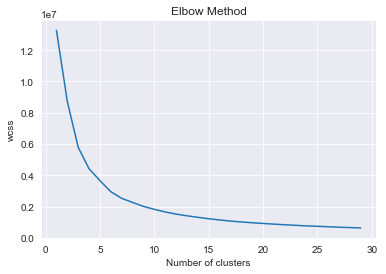

In [7]:
#Using the elbow method to find the optimum number of clusters
# what are clustering best practices
from sklearn.cluster import KMeans
wcss = []
k_size = 30
X = df_cluster[['x','y']]
for i in range(1,k_size):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,k_size),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
##Fitting kmeans to the dataset with k=6
km4=KMeans(n_clusters=10,init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
word_groups = km4.labels_ 
word_groups.shape

(7849,)

In [9]:
df_cluster['word_groups'] = word_groups.tolist()
df_cluster = df_cluster.sort_values(by='word_groups')
df_cluster.head()

,word,x,y,word_groups
3924,mpa,13.605468,-8.620141,0
6232,passionart,-3.263637,-18.896921,0
1123,hall,-0.757438,-29.684044,0
2670,spring,1.083142,0.116023,0
6237,gis,12.057223,-27.919287,0


In [10]:
df_cluster['word_groups'].value_counts()

2    1082
0     982
3     977
5     828
4     770
1     731
8     656
6     621
9     609
7     593
Name: word_groups, dtype: int64

In [11]:
clusters  = df_cluster['word_groups'].unique().tolist()

for cluster in clusters:
    print('*************','cluster 1:', cluster,'*************')
    print(df_cluster[df_cluster['word_groups'] == cluster].head(20))

************* cluster 1: 0 *************
                       word          x          y  word_groups
3924                    mpa  13.605468  -8.620141            0
6232             passionart  -3.263637 -18.896921            0
1123                   hall  -0.757438 -29.684044            0
2670                 spring   1.083142   0.116023            0
6237                    gis  12.057223 -27.919287            0
6239                    buy   6.643726  -1.315525            0
6243  presentation_ceremony   7.247446 -29.484671            0
2672           registration  11.263320 -21.455950            0
6245              guidebook   5.581363 -12.922363            0
2674                  score   2.078946  -2.377648            0
6252              recognise  -4.154928  -8.099331            0
6253            outstanding  -3.910610  -7.423844            0
2682                 domain  16.094955  -9.294956            0
6277                    sls  -9.983405 -11.392632            0
4124          

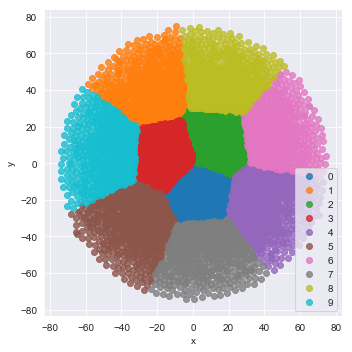

In [12]:
# Vizualize Clusters

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="x", y="y", data=df_cluster, fit_reg=False, hue='word_groups', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [13]:
df_cluster.shape

(7849, 4)

In [14]:
df_cluster[df_cluster.word_groups == 2].tail(5)

,word,x,y,word_groups
4921,winch,16.392988,17.326340,2
7576,good_performance,0.613777,8.638608,2
193,testing,17.657471,-2.563601,2
5664,border,4.838978,4.042942,2
1527,slip,13.863191,15.075146,2


**Zoom in to discover cluster groups and words**

In [325]:
# func with optional parameter: https://hackernoon.com/python-functions-args-kwargs-5d2d00f09c74
def plot_region(x_bounds, y_bounds, **kwargs):
    
    if args:
        cluster = args[0]
        points = df_cluster[df_cluster.word_groups == cluster]
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", #c= 'word_groups', colormap='viridis', 
                            s=35, figsize=(20, 16))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [372]:
max(df_cluster.x)

74.36079406738281

In [20]:
# func with optional parameter: https://hackernoon.com/python-functions-args-kwargs-5d2d00f09c74
def plot_region(**kwargs):
    
    #set base dataset
    points = df_cluster
    
    #set flags
    x_exists = 0
    y_exists = 0
    
    for key, value in kwargs.items():
#         print("The value of {} is {}".format(key, value))
        
        # segment by cluster
        if key == 'cluster':
            points = points[points.word_groups == value]                  
        
        # bound by x
        if key == 'x_bounds':
            x_exists = 1
            lower_x_bound = value[0]
            upper_x_bound = value[1]       

        # bound by y
        if key == 'y_bounds':
            y_exists = 1
            lower_y_bound = value[0]
            upper_y_bound = value[1]
            
    # if no x bounds provided
    if x_exists == 0:
        lower_x_bound = min(points.x) - 1.0
        upper_x_bound = max(points.x) + 1.0
    
    # if no y bounds provided
    if y_exists == 0:
        lower_y_bound = min(points.y) - 1.0 
        upper_y_bound = max(points.y) + 1.0        
     
#     print('after cluster:', points.head(), points.shape)
#     print('x:', lower_x_bound, upper_x_bound)
#     print('y:', lower_y_bound, upper_y_bound)

    # bound dataset
    slice = points[
            (lower_x_bound <= points.x) &
            (points.x <= upper_x_bound) & 
            (lower_y_bound <= points.y) &
            (points.y <= upper_y_bound)
            ]
#     print('after bounding:', slice.head(), slice.shape)
    
    # plot
    ax = slice.plot.scatter("x", "y", #c= 'word_groups', colormap='viridis', 
                            s=100, figsize=(20, 16))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

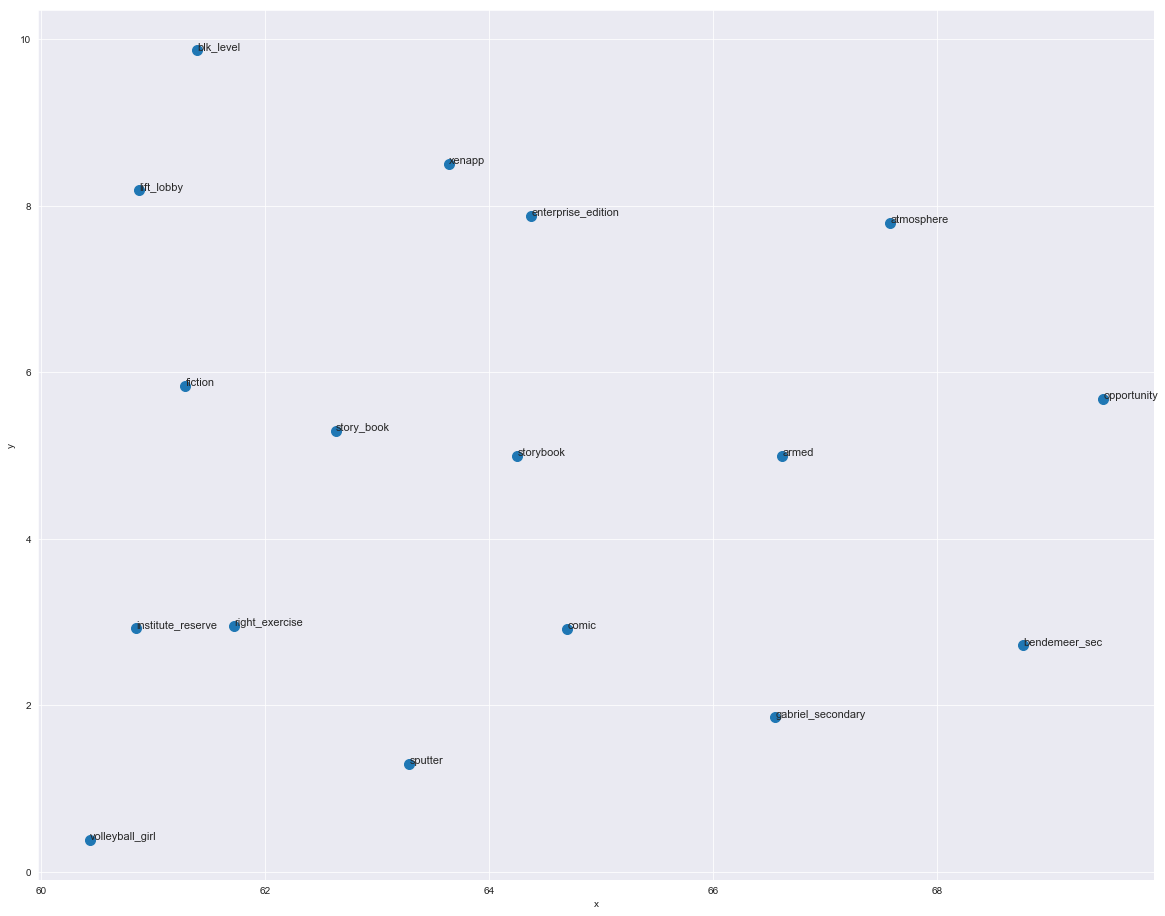

In [21]:
# 1st: which cluster? 2nd: x range? 3rd: y range?
plot_region(cluster =6, x_bounds=(60,70),y_bounds=(0,10))

**Merge Data**

In [33]:
df_words.shape, df_cluster.shape

((86339, 6), (7849, 4))

In [34]:
df_full = pd.merge(df_words, df_cluster[['word','word_groups']], how='left', on=['word'])

In [36]:
df_full.shape, df_full.head()

((86339, 7),
   word_filters               word          x          y  is_target_word  \
 0   engagement         engagement -28.758669 -31.968592               1   
 1   engagement             engage -28.328175 -31.912327               0   
 2   engagement            appoint -39.887165  15.336481               0   
 3   engagement        appointment -25.168325  12.825706               0   
 4   engagement  appointment_panel -40.149910  16.621517               0   
 
    proximity_score  word_groups  
 0         1.000000            5  
 1         0.642953            5  
 2         0.448057            9  
 3         0.439035            3  
 4         0.433022            9  )

,word_filters,word,x,y,is_target_word,proximity_score,word_groups
2695,instructor,instructor,23.017950,-58.584389,1,1.000000,7
2696,instructor,coach,-39.323475,27.008425,0,0.740094,1
2697,instructor,programme,-24.444551,-19.203176,0,0.681479,5
2698,instructor,instuctor,-27.540409,-19.591696,0,0.673102,5
2699,instructor,cca,44.243526,-26.941336,0,0.645780,4
2700,instructor,coach_week,24.436117,-62.109806,0,0.593268,7
2701,instructor,curricular,-27.232790,-17.880617,0,0.577145,5
2702,instructor,main_assistant,-56.943420,-0.129349,0,0.569617,9
2703,instructor,professional_coaching,45.420425,-27.150772,0,0.560481,4
2704,instructor,cca_training,26.412584,-61.163631,0,0.556571,7


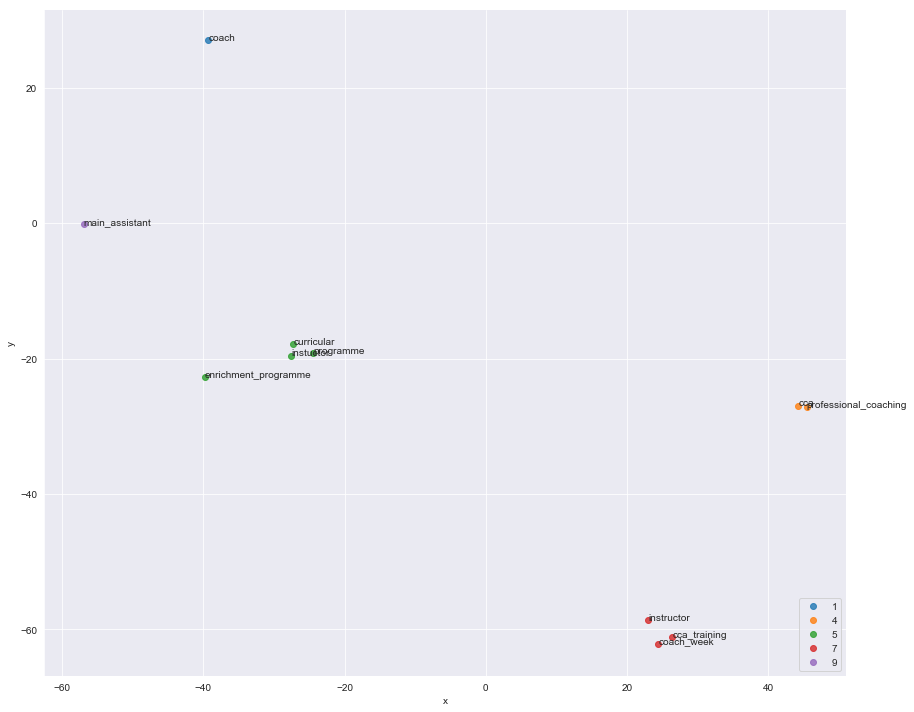

In [64]:
# Use the 'hue' argument to provide a factor variable
filter_word = 'instructor'
test_data = df_full[df_full.word_filters == filter_word]

# sns plot
ax = sns.lmplot( x="x", y="y", data=test_data, fit_reg=False, hue='word_groups', legend= False,
               height=10, aspect=1.2) 

# add labels
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), size = 10)

label_point(test_data.x, test_data.y, test_data.word, plt.gca())
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

# plot
# ax = test_data.plot.scatter("x", "y", c= 'word_groups', legend='viridis', 
#                         s=35, figsize=(20, 16))
# for i, point in test_data.iterrows():
#     ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)
# ax.legend()

test_data

**Cosine Similarity Vs. Euclidean Distance** 

https://cmry.github.io/notes/euclidean-v-cosine

In [ ]:
marge = [54.906185 , -9.140314]
terrific = [-3.189991, 20.440323]
homer = [-57.232517, 56.169361]

In [ ]:
def l2_norm(marge):
    marge_l2 = np.sqrt(marge[0]**2 + marge[1]**2)
    marge_norm = marge/marge_l2
    return marge_norm

marge_norm = l2_norm(marge)
terrific_norm = l2_norm(terrific)
homer_norm = l2_norm(homer)

marge_norm, terrific_norm, homer_norm

In [ ]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))
euclidean_distance(marge_norm, homer_norm), euclidean_distance(terrific_norm, homer_norm)

In [ ]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))
cosine_similarity(marge_norm, homer_norm), cosine_similarity(terrific_norm, homer_norm)

In [ ]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

marge_norm = l1_normalize(marge)
terrific_norm = l1_normalize(terrific)
homer_norm = l1_normalize(homer)
marge_norm, homer_norm, terrific_norm

In [ ]:
cosine_similarity(marge_norm, homer_norm), cosine_similarity(terrific_norm, homer_norm)

In [ ]:
euclidean_distance(marge_norm, homer_norm), euclidean_distance(terrific_norm, homer_norm)

In [ ]:
def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

marge_norm = l2_normalize(marge)
terrific_norm = l2_normalize(terrific)
homer_norm = l2_normalize(homer)
marge_norm, homer_norm, terrific_norm

In [ ]:
cosine_similarity(marge_norm, homer_norm), cosine_similarity(terrific_norm, homer_norm)

In [ ]:
euclidean_distance(marge_norm, homer_norm), euclidean_distance(terrific_norm, homer_norm)

This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.

https://github.com/RaRe-Technologies/gensim/blob/9a02527ab315d00dae30088855d2ca466cc3e436/gensim/models/word2vec.py#L1209